In [1]:
import os
os.chdir('build/')
from runner_utils import *
from globals import *
from stats_utils import *
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
PATH_TO_COVID

'/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build'

In [3]:
from IPython.core.display import HTML


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Checking equilibriation time 

In [91]:
param_names = ['seed']
param_values = [0]

In [92]:
print(generate_param_list(param_names, param_values, './build/covid'))

./build/covid --seed=0 


In [95]:
program_name = './covid'

In [96]:
output = run_program_default(param_names, param_values, program_name)

Compiling program


In [97]:
res = read_output([fnames[0]], h_cols)

/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build


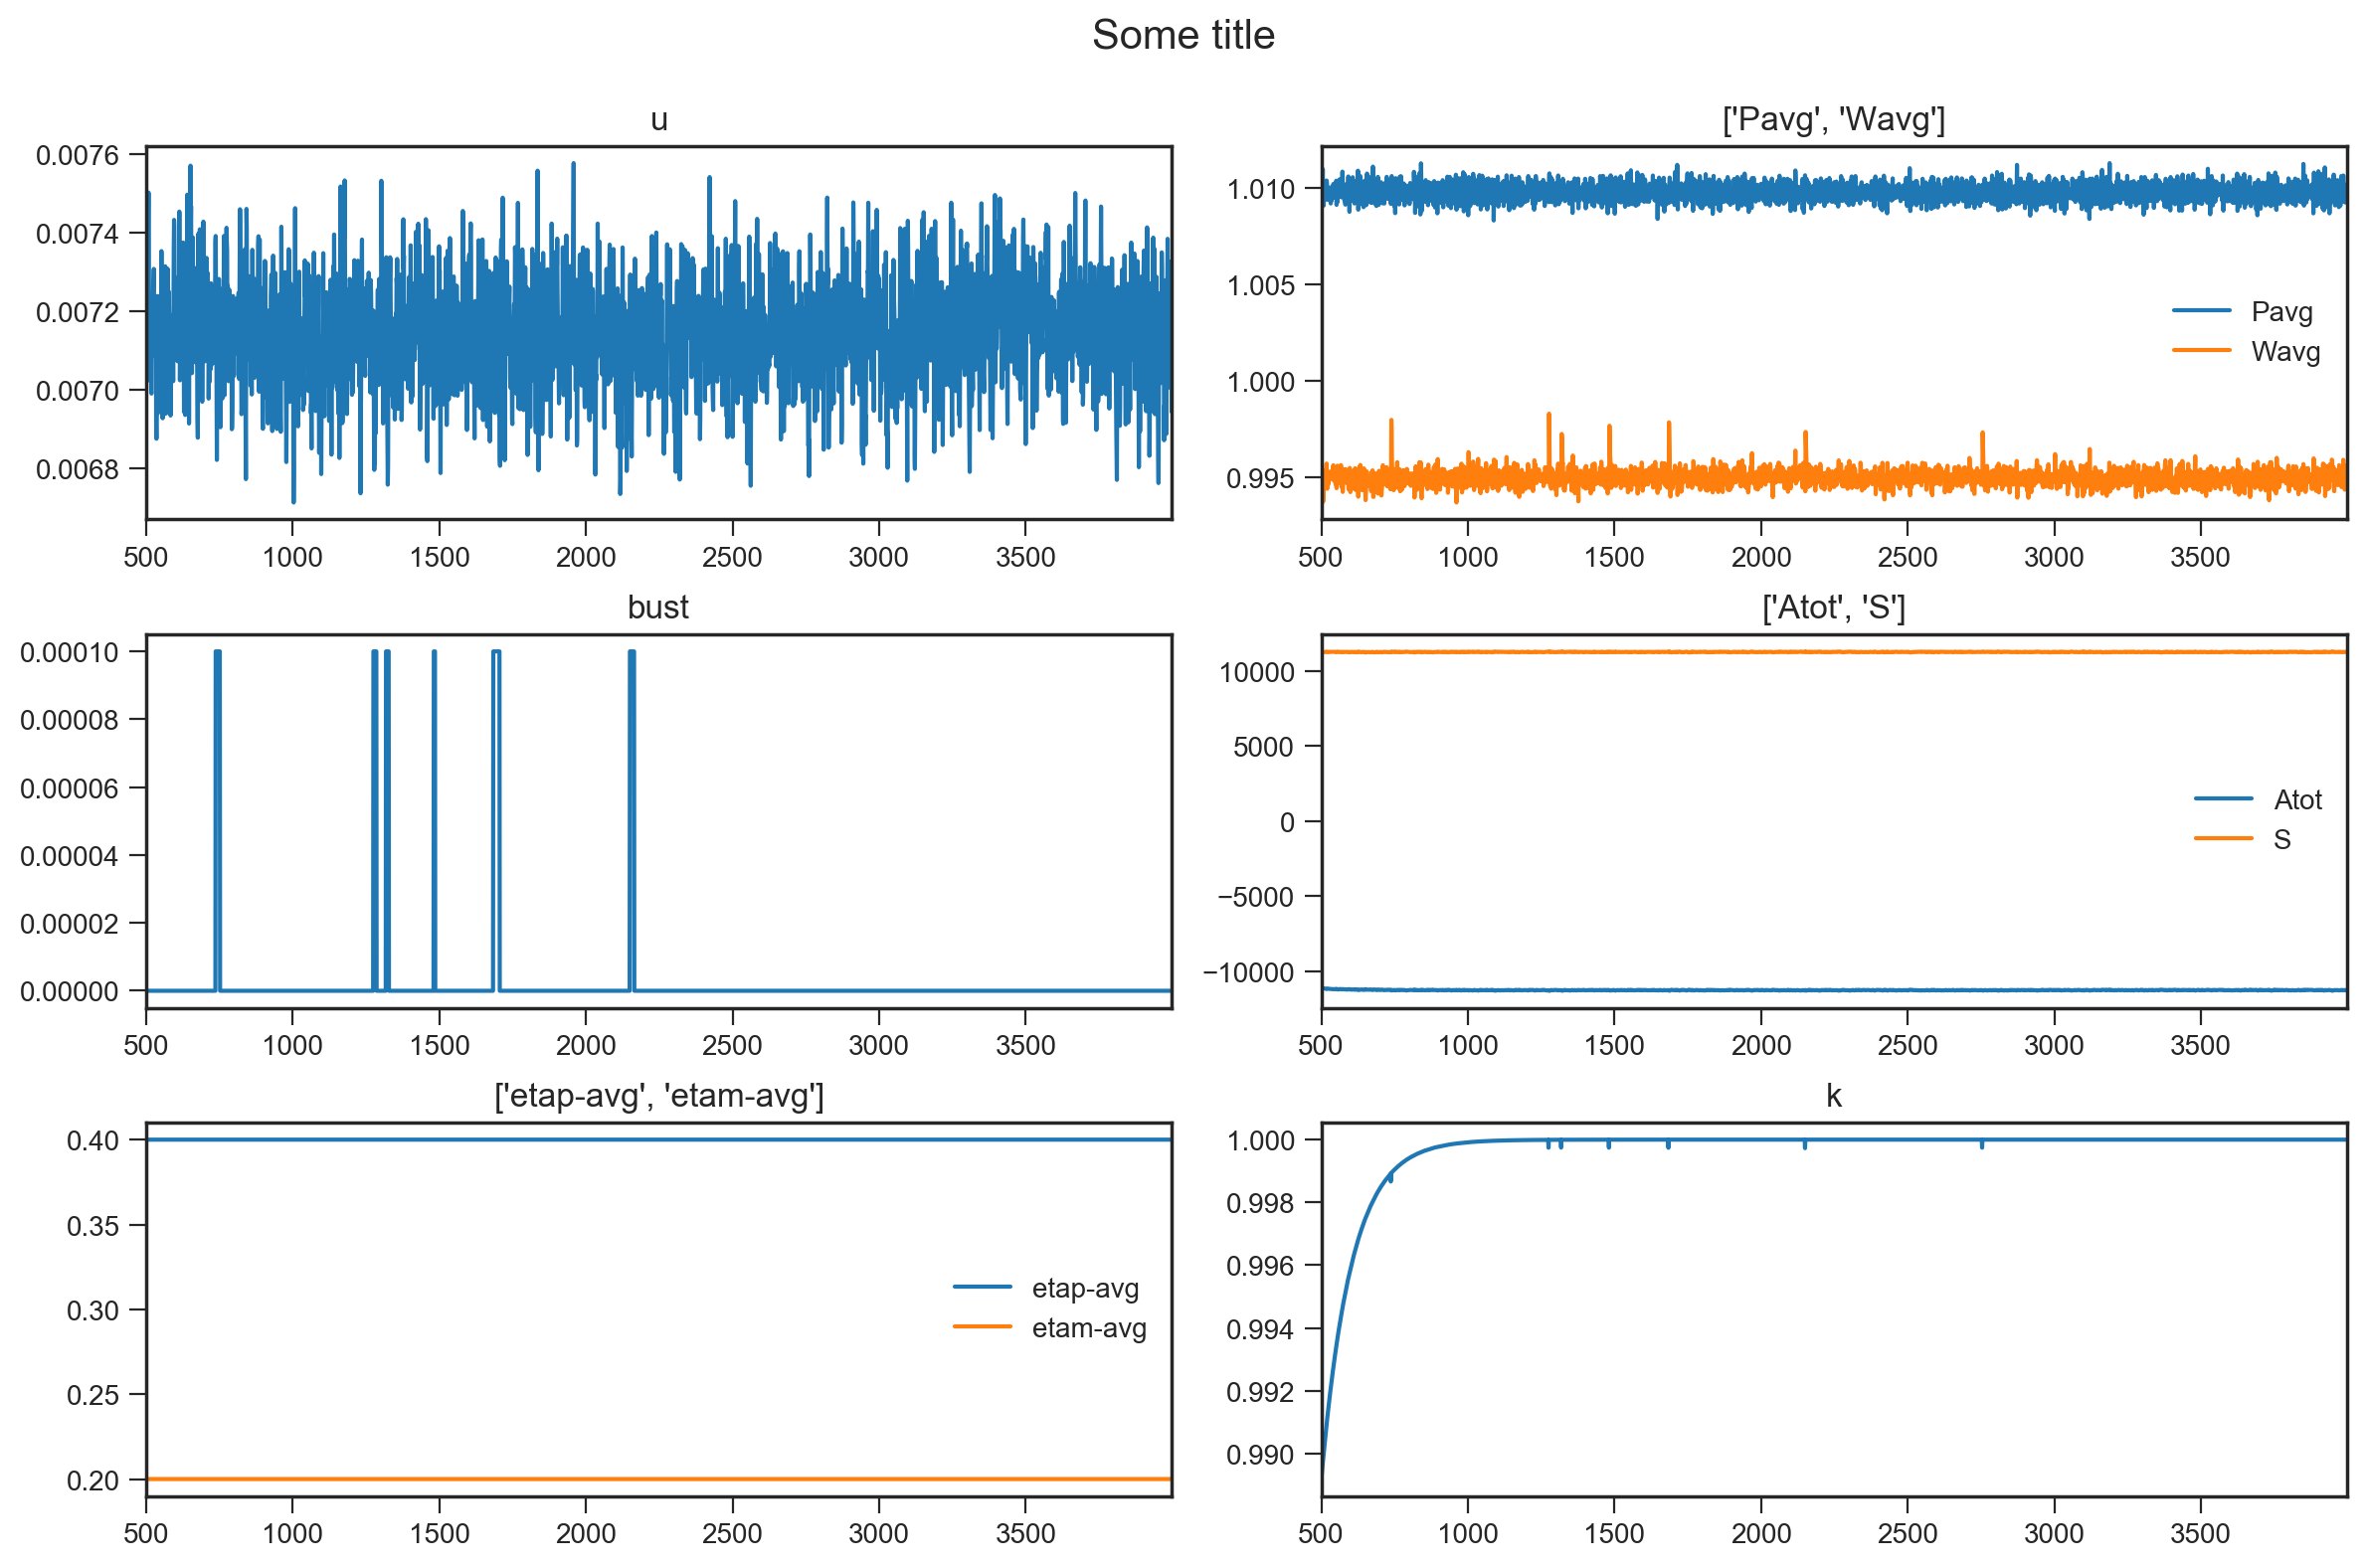

In [102]:
t_plot(res['base'], fd = 500, td = 4000, title = "Some title")

## Crisis times for Consumption shock + Firing shock

1. shockflag = 2
2. t_start = 500
3. t_end = 505
4. fname = 'firing_shock'

We do it two ways: same seed but different times when the shock starts. Otherwise we do the same t_start but different seeds. 

Both times, we do the thing for 200 iterations. 

In [70]:
# os.chdir('build/')

In [114]:
param_names = ['shockflag', 't_start', 't_end', 'seed']
param_values = [2, 500, 505,0]

In [115]:
generate_param_list(param_names, param_values, './build/covid')

'./build/covid --shockflag=2  --t_start=500  --t_end=505  --seed=0 '

In [116]:
run_program_default(param_names, param_values, './covid')

Compiling program


0

In [123]:
shock_name = flagnames[2]

In [118]:
res = read_output([fnames[2]], h_cols)

/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build


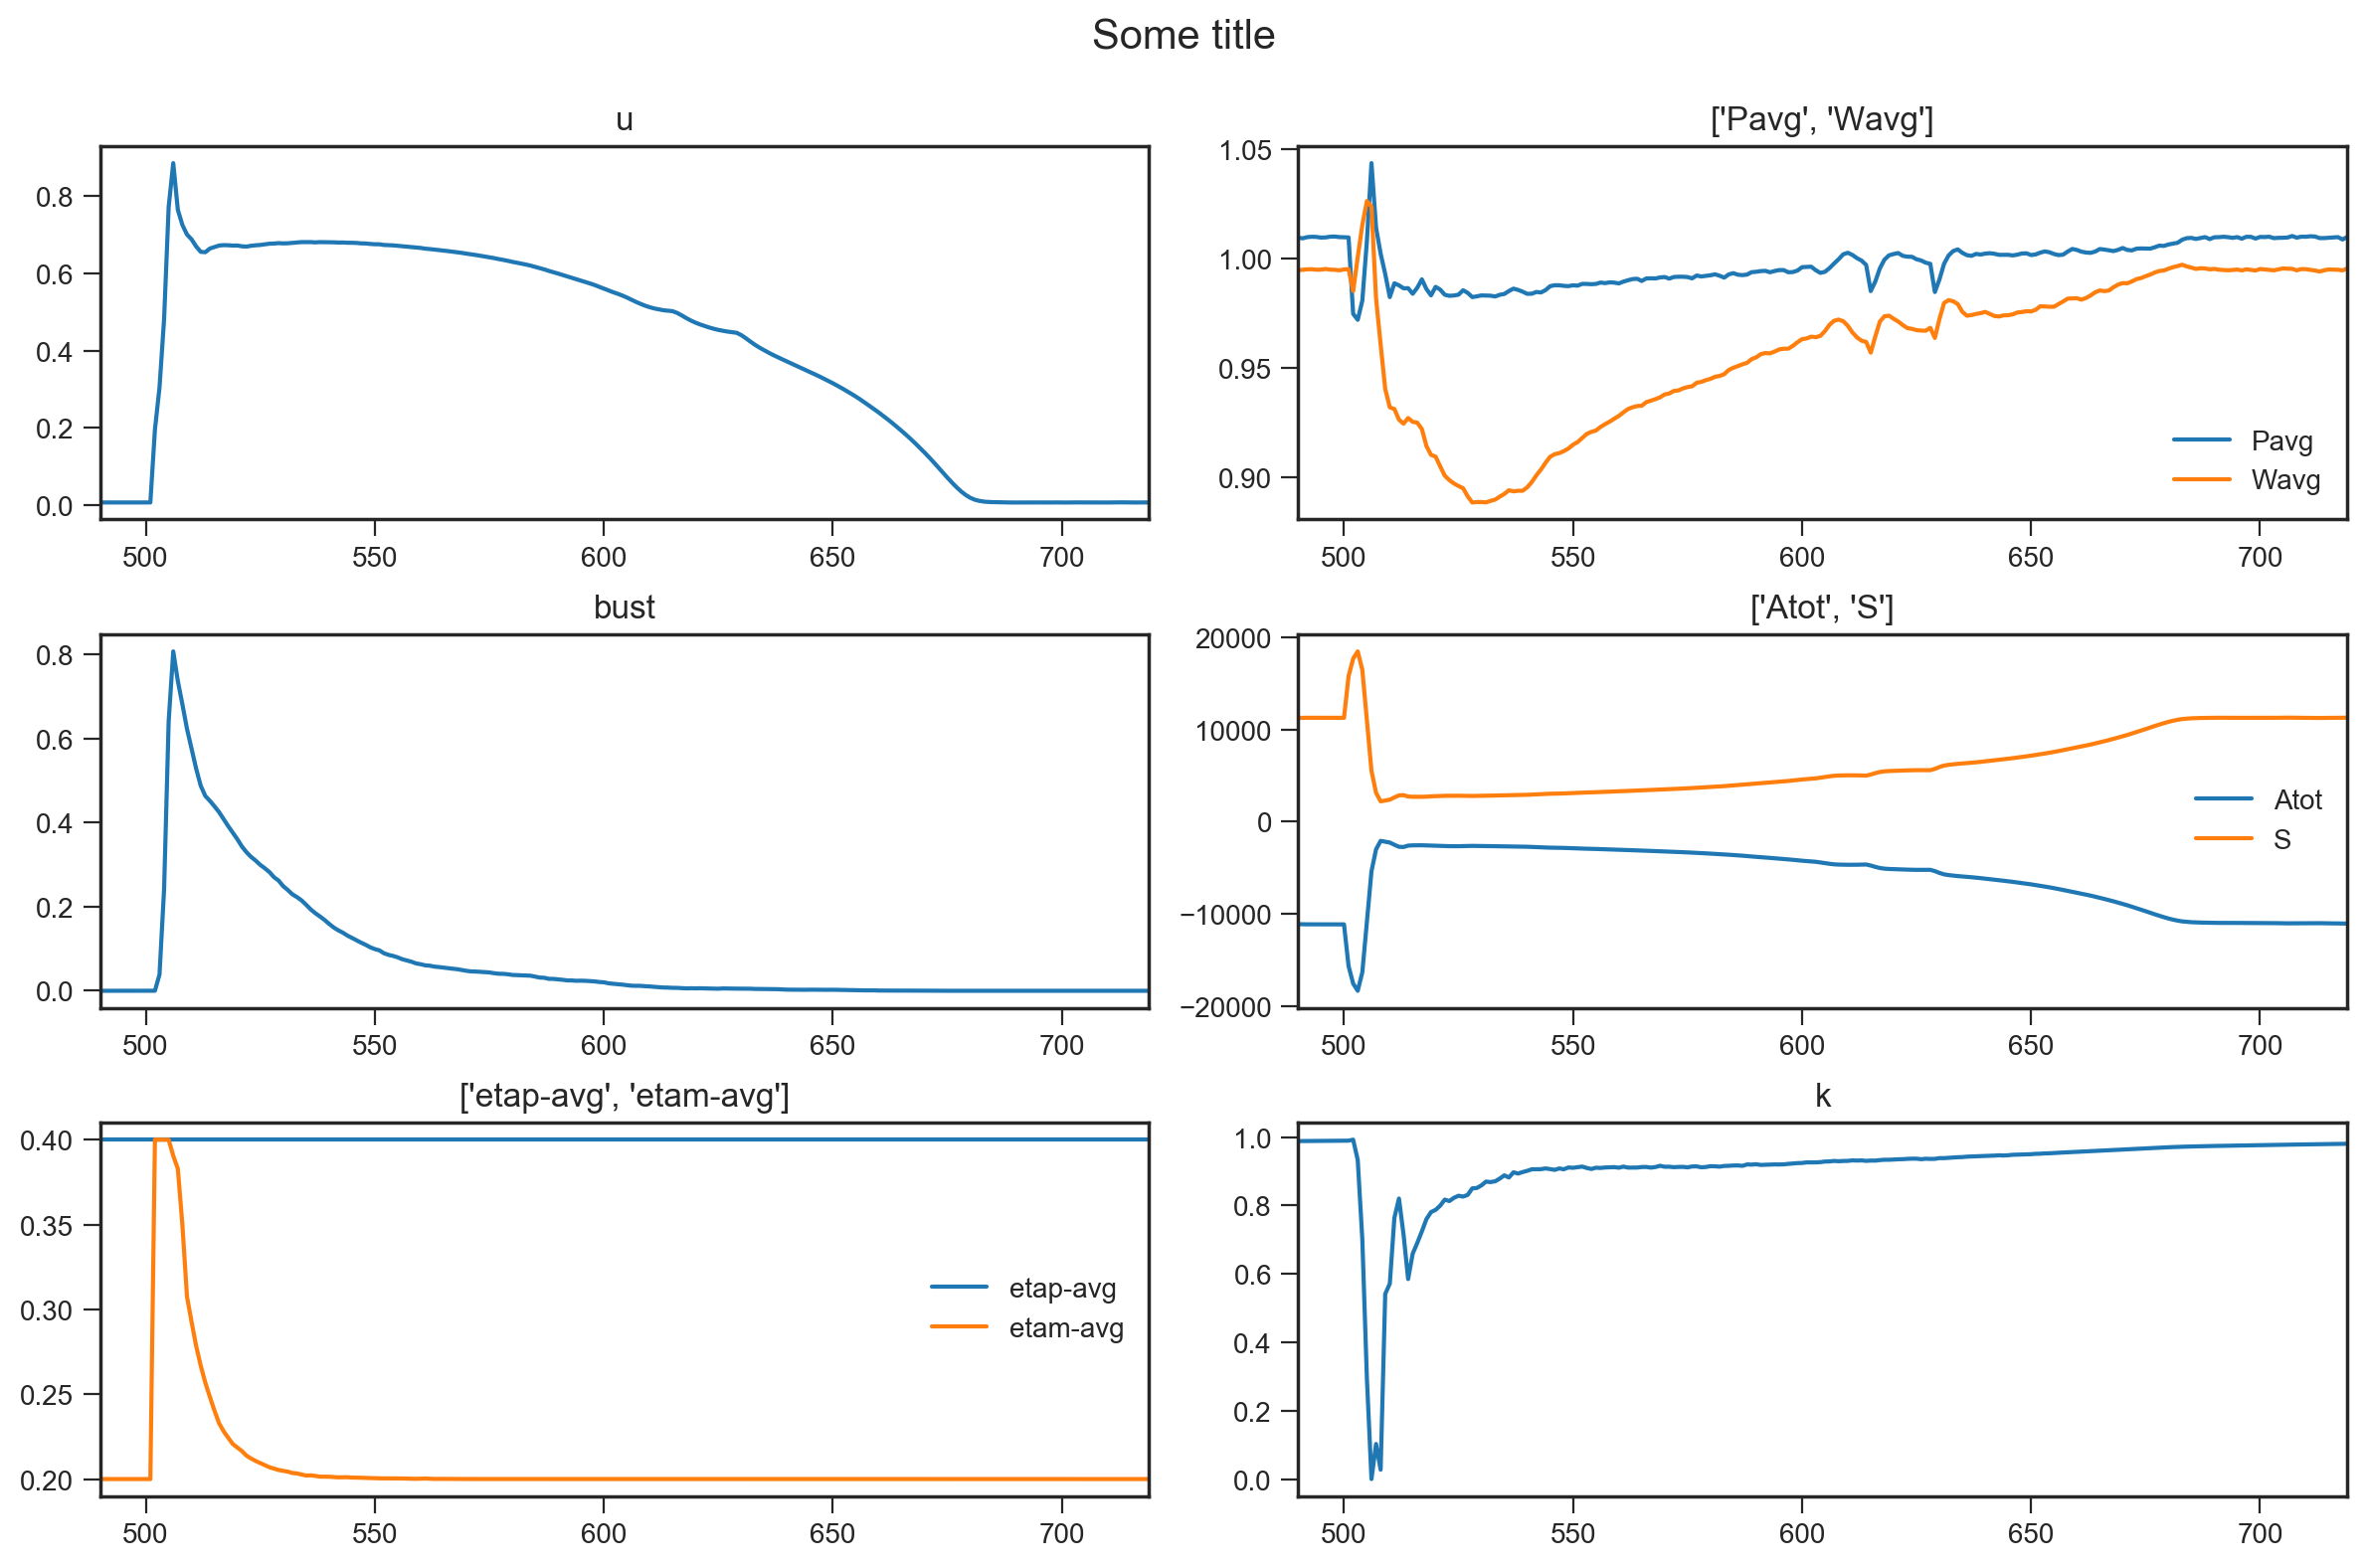

In [124]:
t_plot(res[shock_name], fd=490, td=720, title = "Some title")

In [145]:
crisis_times = run_with_different_seed(shockflag=2, seed_default=0)

seed = 0, t-final = 172
seed = 1, t-final = 196
seed = 2, t-final = 184
seed = 3, t-final = 207
seed = 4, t-final = 168
seed = 5, t-final = 195
seed = 6, t-final = 211
seed = 7, t-final = 255
seed = 8, t-final = 191
seed = 9, t-final = 207
seed = 10, t-final = 196
seed = 11, t-final = 182
seed = 12, t-final = 227
seed = 13, t-final = 217
seed = 14, t-final = 180
seed = 15, t-final = 243
seed = 16, t-final = 208
seed = 17, t-final = 200
seed = 18, t-final = 210
seed = 19, t-final = 196
seed = 20, t-final = 188
seed = 21, t-final = 278
seed = 22, t-final = 197
seed = 23, t-final = 198
seed = 24, t-final = 230
seed = 25, t-final = 206
seed = 26, t-final = 203
seed = 27, t-final = 225
seed = 28, t-final = 200
seed = 29, t-final = 183
seed = 30, t-final = 198
seed = 31, t-final = 221
seed = 32, t-final = 231
seed = 33, t-final = 228
seed = 34, t-final = 219
seed = 35, t-final = 195
seed = 36, t-final = 332
seed = 37, t-final = 239
seed = 38, t-final = 203
seed = 39, t-final = 184
seed = 40,

In [153]:
crisis_df = pd.DataFrame({
    'seed': range(200),
    'T-crisis': crisis_times
    })

In [156]:
crisis_df.to_csv('crisis_fixed_500.csv', sep="\t",  index=None)

In [167]:
crisis_times_bis = run_with_different_start_time(shockflag=2, nb_runs=200)

T-start = 500, t-final = 172
T-start = 510, t-final = 173
T-start = 520, t-final = 241
T-start = 530, t-final = 271
T-start = 540, t-final = 253
T-start = 550, t-final = 324
T-start = 560, t-final = 214
T-start = 570, t-final = 331
T-start = 580, t-final = 490
T-start = 590, t-final = 224
T-start = 600, t-final = 217
T-start = 610, t-final = 518
T-start = 620, t-final = 225
T-start = 630, t-final = 204
T-start = 640, t-final = 535
T-start = 650, t-final = 547
T-start = 660, t-final = 564
T-start = 670, t-final = 548
T-start = 680, t-final = 415
T-start = 690, t-final = 581
T-start = 700, t-final = 232
T-start = 710, t-final = 590
T-start = 720, t-final = 597
T-start = 730, t-final = 616
T-start = 740, t-final = 407
T-start = 750, t-final = 592
T-start = 760, t-final = 632
T-start = 770, t-final = 622
T-start = 780, t-final = 651
T-start = 790, t-final = 268
T-start = 800, t-final = 672
T-start = 810, t-final = 676
T-start = 820, t-final = 674
T-start = 830, t-final = 664
T-start = 840,

In [175]:
t_starts =  500+ np.arange(0,2000, 10)
crisis_times_bis_df = pd.DataFrame({
    'T-start' : t_starts,
    'T-crisis': crisis_times_bis
})


In [177]:
crisis_times_bis_df.to_csv('crisis_vary_tstart.csv', sep = "\t", index = None)

In [171]:
crisis_times_ter = run_with_different_start_time(shockflag=2, t_start=3000, nb_runs=20)

T-start = 3000, t-final = 2122
T-start = 3010, t-final = 355
T-start = 3020, t-final = 2156
T-start = 3030, t-final = 2149
T-start = 3040, t-final = 2169
T-start = 3050, t-final = 2176
T-start = 3060, t-final = 469
T-start = 3070, t-final = 2161
T-start = 3080, t-final = 2178
T-start = 3090, t-final = 2181
T-start = 3100, t-final = 2215
T-start = 3110, t-final = 2188
T-start = 3120, t-final = 2185
T-start = 3130, t-final = 2191
T-start = 3140, t-final = 2196
T-start = 3150, t-final = 2207
T-start = 3160, t-final = 2227
T-start = 3170, t-final = 2227
T-start = 3180, t-final = 2216
T-start = 3190, t-final = 2205



In [181]:
crisis_times_quad = run_with_different_seed(shockflag=2, seed_default=-1, nb_runs=20)

seed = -1.0, t-final = 189
seed = -1.0, t-final = 188
seed = -1.0, t-final = 196
seed = -1.0, t-final = 203
seed = -1.0, t-final = 197
seed = -1.0, t-final = 171
seed = -1.0, t-final = 287
seed = -1.0, t-final = 174
seed = -1.0, t-final = 315
seed = -1.0, t-final = 236
seed = -1.0, t-final = 204
seed = -1.0, t-final = 201
seed = -1.0, t-final = 232
seed = -1.0, t-final = 224
seed = -1.0, t-final = 199
seed = -1.0, t-final = 301
seed = -1.0, t-final = 218
seed = -1.0, t-final = 255
seed = -1.0, t-final = 245
seed = -1.0, t-final = 237



In [182]:
crisis_times_quad_3000 = run_with_different_seed(shockflag=2, seed_default=-1, nb_runs=20, t_start=3000)

seed = -1.0, t-final = 2119
seed = -1.0, t-final = 2121
seed = -1.0, t-final = 2124
seed = -1.0, t-final = 2137
seed = -1.0, t-final = 2120
seed = -1.0, t-final = 2150
seed = -1.0, t-final = 2114
seed = -1.0, t-final = 2150
seed = -1.0, t-final = 2157
seed = -1.0, t-final = 2141
seed = -1.0, t-final = 2107
seed = -1.0, t-final = 2128
seed = -1.0, t-final = 2145
seed = -1.0, t-final = 2116
seed = -1.0, t-final = 2132
seed = -1.0, t-final = 2121
seed = -1.0, t-final = 2147
seed = -1.0, t-final = 526
seed = -1.0, t-final = 2103
seed = -1.0, t-final = 2116



In [186]:
crisis_times_interp = run_with_different_start_time(shockflag=2, t_start=2500, nb_runs = 50)

T-start = 2500, t-final = 1797
T-start = 2510, t-final = 1799
T-start = 2520, t-final = 1807
T-start = 2530, t-final = 1814
T-start = 2540, t-final = 1818
T-start = 2550, t-final = 1821
T-start = 2560, t-final = 1830
T-start = 2570, t-final = 1826
T-start = 2580, t-final = 1849
T-start = 2590, t-final = 1852
T-start = 2600, t-final = 1851
T-start = 2610, t-final = 1860
T-start = 2620, t-final = 1864
T-start = 2630, t-final = 1880
T-start = 2640, t-final = 1892
T-start = 2650, t-final = 1897
T-start = 2660, t-final = 1897
T-start = 2670, t-final = 1894
T-start = 2680, t-final = 1904
T-start = 2690, t-final = 1918
T-start = 2700, t-final = 537
T-start = 2710, t-final = 1932
T-start = 2720, t-final = 1940
T-start = 2730, t-final = 1946
T-start = 2740, t-final = 462
T-start = 2750, t-final = 1978
T-start = 2760, t-final = 371
T-start = 2770, t-final = 1968
T-start = 2780, t-final = 1977
T-start = 2790, t-final = 1995
T-start = 2800, t-final = 1994
T-start = 2810, t-final = 2012
T-start = 2

In [187]:
all_crisis_times = crisis_times_bis + crisis_times_interp + crisis_times_ter
len(all_crisis_times)

270

In [189]:
t_starts = 500 + np.arange(0,2700,10)
len(t_starts) == len(all_crisis_times)

True

In [191]:
all_crisis_times_fixed_seed_df = pd.DataFrame({
    'T-start': t_starts, 
    'T-crisis': all_crisis_times,
    'seed' :np.zeros(len(all_crisis_times))
})

In [193]:
all_crisis_times_fixed_seed_df.to_csv('all_crisis_times_fixed_seed_firing.csv', sep="\t", 
                                     index=None)

### Plots

In [202]:
path_plots

'plots/'

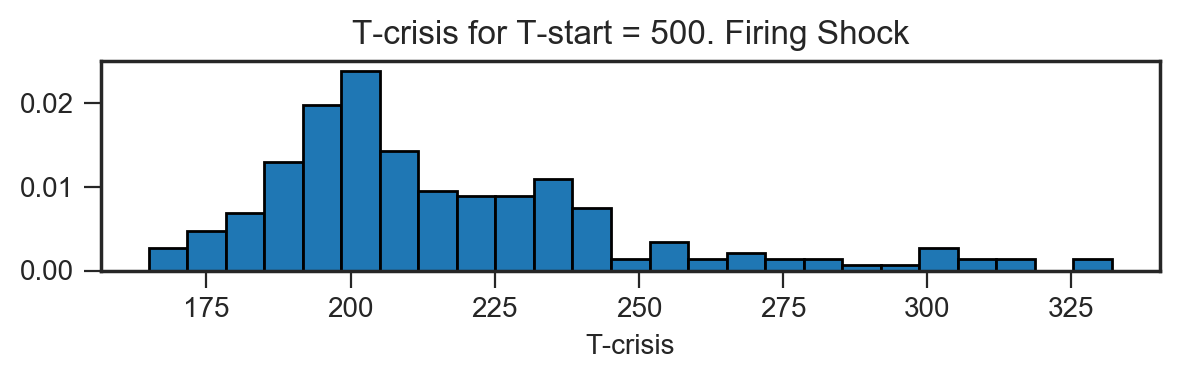

In [205]:
# T-start = 500, different seeds

fig, ax = plt.subplots(1,1,dpi=200, figsize = (6,2))
p = ax.hist(crisis_times + crisis_times_quad, ec = "k", density = True,bins =25)
ax.set_title('T-crisis for T-start = 500. Firing Shock')
ax.set_xlabel('T-crisis')
plt.tight_layout()
fname = 'distrib_t_crisis_500_firing_shock'
plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

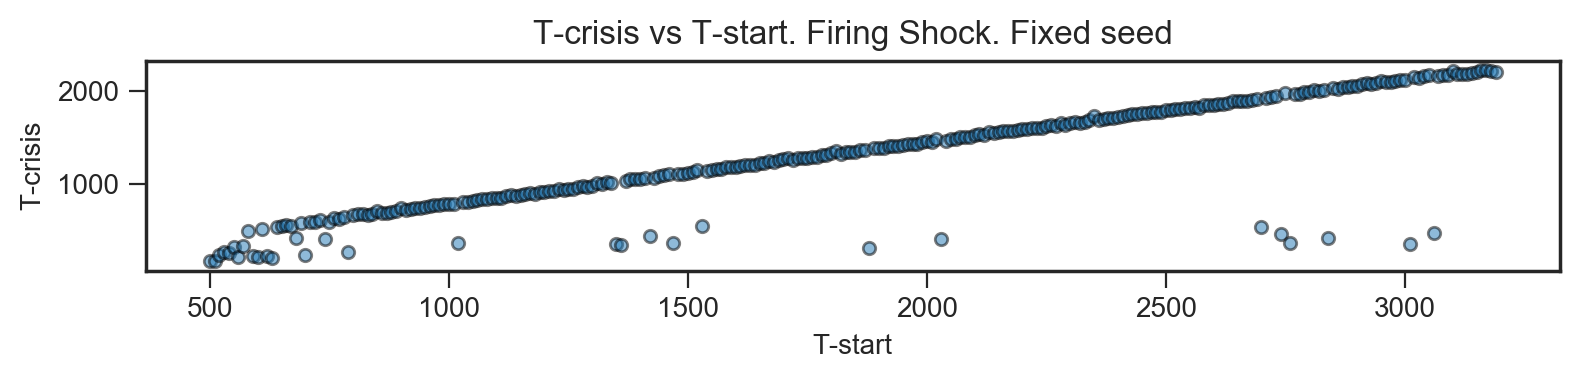

In [249]:
fig, ax = plt.subplots(1,1,dpi=200, figsize = (8,2))
p = ax.scatter(t_starts, all_crisis_times, s = 20, ec = "k", alpha = 0.5)
ax.set_title('T-crisis vs T-start. Firing Shock. Fixed seed')
ax.set_xlabel('T-start')
ax.set_ylabel('T-crisis')
plt.tight_layout()
fname = 't_crisis_scatter_fixed_seed_firing'
plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

## Repeat analysis for consumption shock

In [107]:
crisis_times_fixed_seed_cons_pure_bis = run_with_different_start_time(shockflag=1, nb_runs=10, t_start=3000)

T-start = 3000, t-final = 2117
T-start = 3010, t-final = 2146
T-start = 3020, t-final = 2142
T-start = 3030, t-final = 2171
T-start = 3040, t-final = 2173
T-start = 3050, t-final = 2187
T-start = 3060, t-final = 163
T-start = 3070, t-final = 2224
T-start = 3080, t-final = 179
T-start = 3090, t-final = 2259



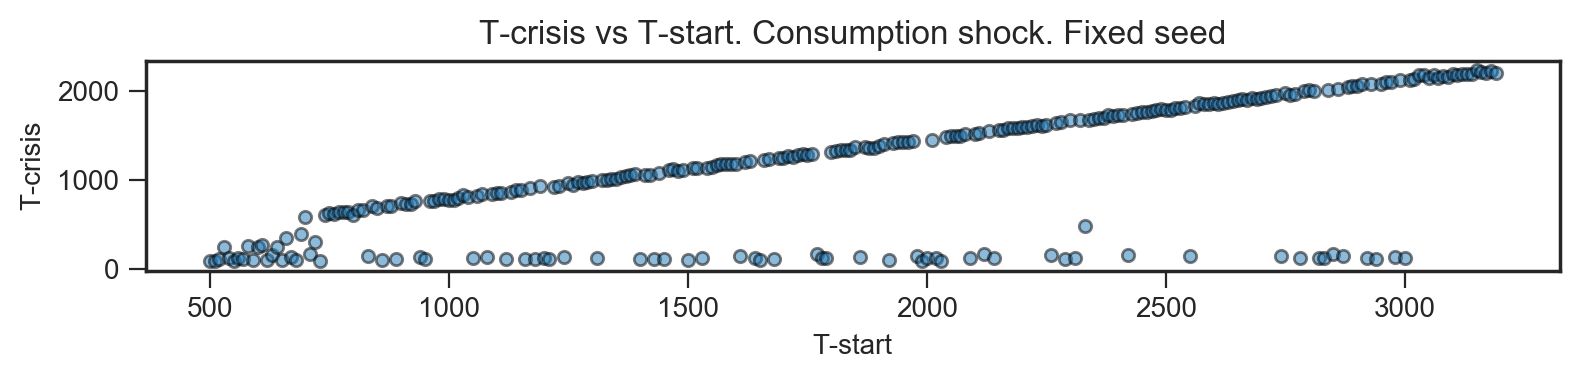

In [255]:
t_starts= 500 + np.arange(0,2700,10)
fig, ax = plt.subplots(1,1,dpi=200, figsize = (8,2))
p = ax.scatter(t_starts, crisis_times_fixed_seed_cons_pure, s = 20, ec = "k", alpha = 0.5)
ax.set_title('T-crisis vs T-start. Consumption shock. Fixed seed')
ax.set_xlabel('T-start')
ax.set_ylabel('T-crisis')
plt.tight_layout()
fname = 't_crisis_scatter_fixed_seed_consumption'
plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

In [256]:
crisis_times_variable_seed_500_cons_pure= run_with_different_seed(shockflag=1, nb_runs=50, t_start=500)

seed = -1.0, t-final = 95
seed = -1.0, t-final = 142
seed = -1.0, t-final = 116
seed = -1.0, t-final = 103
seed = -1.0, t-final = 116
seed = -1.0, t-final = 92
seed = -1.0, t-final = 87
seed = -1.0, t-final = 93
seed = -1.0, t-final = 98
seed = -1.0, t-final = 100
seed = -1.0, t-final = 99
seed = -1.0, t-final = 120
seed = -1.0, t-final = 116
seed = -1.0, t-final = 86
seed = -1.0, t-final = 103
seed = -1.0, t-final = 94
seed = -1.0, t-final = 86
seed = -1.0, t-final = 95
seed = -1.0, t-final = 118
seed = -1.0, t-final = 102
seed = -1.0, t-final = 91
seed = -1.0, t-final = 225
seed = -1.0, t-final = 99
seed = -1.0, t-final = 102
seed = -1.0, t-final = 105
seed = -1.0, t-final = 95
seed = -1.0, t-final = 99
seed = -1.0, t-final = 83
seed = -1.0, t-final = 82
seed = -1.0, t-final = 112
seed = -1.0, t-final = 95
seed = -1.0, t-final = 209
seed = -1.0, t-final = 99
seed = -1.0, t-final = 100
seed = -1.0, t-final = 120
seed = -1.0, t-final = 116
seed = -1.0, t-final = 172
seed = -1.0, t-fina

In [257]:
crisis_times_variable_seed_1000_cons_pure= run_with_different_seed(shockflag=1, nb_runs=50, t_start=1000)

seed = -1.0, t-final = 123
seed = -1.0, t-final = 783
seed = -1.0, t-final = 775
seed = -1.0, t-final = 804
seed = -1.0, t-final = 124
seed = -1.0, t-final = 787
seed = -1.0, t-final = 790
seed = -1.0, t-final = 791
seed = -1.0, t-final = 123
seed = -1.0, t-final = 784
seed = -1.0, t-final = 132
seed = -1.0, t-final = 799
seed = -1.0, t-final = 786
seed = -1.0, t-final = 163
seed = -1.0, t-final = 797
seed = -1.0, t-final = 790
seed = -1.0, t-final = 123
seed = -1.0, t-final = 203
seed = -1.0, t-final = 779
seed = -1.0, t-final = 789
seed = -1.0, t-final = 792
seed = -1.0, t-final = 111
seed = -1.0, t-final = 775
seed = -1.0, t-final = 795
seed = -1.0, t-final = 801
seed = -1.0, t-final = 97
seed = -1.0, t-final = 792
seed = -1.0, t-final = 773
seed = -1.0, t-final = 805
seed = -1.0, t-final = 789
seed = -1.0, t-final = 403
seed = -1.0, t-final = 136
seed = -1.0, t-final = 94
seed = -1.0, t-final = 776
seed = -1.0, t-final = 780
seed = -1.0, t-final = 809
seed = -1.0, t-final = 789
see

In [258]:
crisis_times_variable_seed_2000_cons_pure= run_with_different_seed(shockflag=1, nb_runs=50, t_start=2000)

seed = -1.0, t-final = 1443
seed = -1.0, t-final = 1478
seed = -1.0, t-final = 123
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1479
seed = -1.0, t-final = 103
seed = -1.0, t-final = 1463
seed = -1.0, t-final = 143
seed = -1.0, t-final = 123
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1464
seed = -1.0, t-final = 1023
seed = -1.0, t-final = 1475
seed = -1.0, t-final = 1446
seed = -1.0, t-final = 1462
seed = -1.0, t-final = 1463
seed = -1.0, t-final = 1462
seed = -1.0, t-final = 1453
seed = -1.0, t-final = 1451
seed = -1.0, t-final = 1452
seed = -1.0, t-final = 1468
seed = -1.0, t-final = 1450
seed = -1.0, t-final = 1459
seed = -1.0, t-final = 1455
seed = -1.0, t-final = 1449
seed = -1.0, t-final = 1458
seed = -1.0, t-final = 1455
seed = -1.0, t-final = 1456
seed = -1.0, t-final = 1456
seed = -1.0, t-final = 114
seed = -1.0, t-final = 1461
seed = -1.0, t-final = 1459
seed = -1.0, t-final = 1465
seed = -1.0, t-final = 1464
seed = -1.0, t-final = 1454
seed = -1.0, t-final = 13

In [259]:
crisis_times_variable_seed_3000_cons_pure= run_with_different_seed(shockflag=1, nb_runs=50, t_start=3000)

seed = -1.0, t-final = 2152
seed = -1.0, t-final = 2114
seed = -1.0, t-final = 2142
seed = -1.0, t-final = 2123
seed = -1.0, t-final = 2135
seed = -1.0, t-final = 2130
seed = -1.0, t-final = 134
seed = -1.0, t-final = 2121
seed = -1.0, t-final = 2117
seed = -1.0, t-final = 140
seed = -1.0, t-final = 2130
seed = -1.0, t-final = 2115
seed = -1.0, t-final = 2117
seed = -1.0, t-final = 2123
seed = -1.0, t-final = 2139
seed = -1.0, t-final = 118
seed = -1.0, t-final = 2111
seed = -1.0, t-final = 132
seed = -1.0, t-final = 2150
seed = -1.0, t-final = 140
seed = -1.0, t-final = 2107
seed = -1.0, t-final = 2133
seed = -1.0, t-final = 2113
seed = -1.0, t-final = 2141
seed = -1.0, t-final = 2145
seed = -1.0, t-final = 2117
seed = -1.0, t-final = 2143
seed = -1.0, t-final = 2135
seed = -1.0, t-final = 2140
seed = -1.0, t-final = 2115
seed = -1.0, t-final = 2121
seed = -1.0, t-final = 2148
seed = -1.0, t-final = 2129
seed = -1.0, t-final = 2124
seed = -1.0, t-final = 2148
seed = -1.0, t-final = 11

In [282]:
crisis_times_variable_seed_cons_pure = np.vstack((
    np.asarray(crisis_times_variable_seed_500_cons_pure),
    np.asarray(crisis_times_variable_seed_1000_cons_pure),
    np.asarray(crisis_times_variable_seed_2000_cons_pure),
    np.asarray(crisis_times_variable_seed_3000_cons_pure)))
np.savetxt('crisis_times_cons_pure_var.txt', crisis_times_variable_seed_cons_pure)

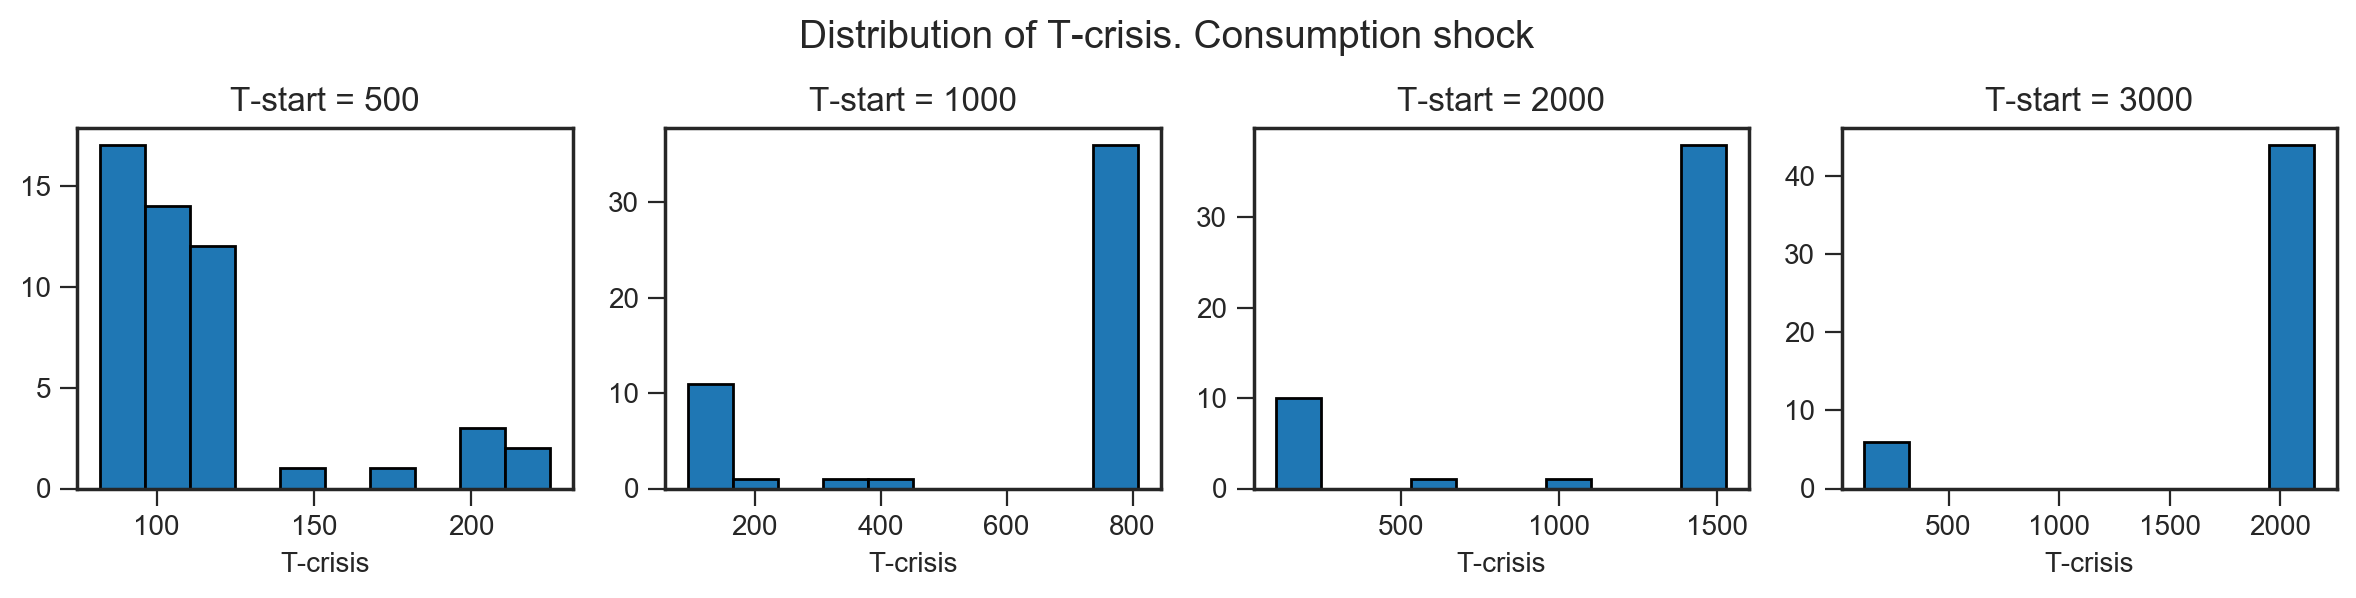

In [271]:
fig, ax = plt.subplots(1,4, dpi=200, figsize=(12,3))

p1 = ax[0].hist(crisis_times_variable_seed_500_cons_pure, ec = "k", )
p2 = ax[1].hist(crisis_times_variable_seed_1000_cons_pure, ec = "k", )
p3 = ax[2].hist(crisis_times_variable_seed_2000_cons_pure, ec = "k", )
p4 = ax[3].hist(crisis_times_variable_seed_3000_cons_pure, ec = "k",  )

t_starts = [500,1000, 2000, 3000]
for i in range(4):
    ax[i].set_title(f'T-start = {t_starts[i]}')
    ax[i].set_xlabel('T-crisis')
plt.tight_layout()
plt.suptitle('Distribution of T-crisis. Consumption shock', fontsize=14)
plt.subplots_adjust(top=0.8)
fname = 't_crisis_dist_variable_seed_consumption'
# plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

In [272]:
crisis_times_variable_seed_2000_firing= run_with_different_seed(shockflag=2, nb_runs=50, t_start=2000)

seed = -1.0, t-final = 1454
seed = -1.0, t-final = 1467
seed = -1.0, t-final = 1447
seed = -1.0, t-final = 1461
seed = -1.0, t-final = 1466
seed = -1.0, t-final = 1447
seed = -1.0, t-final = 1450
seed = -1.0, t-final = 1465
seed = -1.0, t-final = 1452
seed = -1.0, t-final = 1453
seed = -1.0, t-final = 1460
seed = -1.0, t-final = 1459
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1455
seed = -1.0, t-final = 1450
seed = -1.0, t-final = 1454
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1458
seed = -1.0, t-final = 1447
seed = -1.0, t-final = 1453
seed = -1.0, t-final = 1469
seed = -1.0, t-final = 1458
seed = -1.0, t-final = 1447
seed = -1.0, t-final = 1448
seed = -1.0, t-final = 1465
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1458
seed = -1.0, t-final = 1445
seed = -1.0, t-final = 1459
seed = -1.0, t-final = 1447
seed = -1.0, t-final = 1451
seed = -1.0, t-final = 479
seed = -1.0, t-final = 1452
seed = -1.0, t-final = 1457
seed = -1.0, t-final = 1454
seed = -1.0, t-final 

In [273]:
crisis_times_variable_seed_1000_firing= run_with_different_seed(shockflag=2, nb_runs=50, t_start=1000)

seed = -1.0, t-final = 783
seed = -1.0, t-final = 787
seed = -1.0, t-final = 782
seed = -1.0, t-final = 785
seed = -1.0, t-final = 784
seed = -1.0, t-final = 777
seed = -1.0, t-final = 780
seed = -1.0, t-final = 446
seed = -1.0, t-final = 785
seed = -1.0, t-final = 784
seed = -1.0, t-final = 786
seed = -1.0, t-final = 800
seed = -1.0, t-final = 779
seed = -1.0, t-final = 789
seed = -1.0, t-final = 787
seed = -1.0, t-final = 785
seed = -1.0, t-final = 782
seed = -1.0, t-final = 781
seed = -1.0, t-final = 784
seed = -1.0, t-final = 782
seed = -1.0, t-final = 800
seed = -1.0, t-final = 784
seed = -1.0, t-final = 789
seed = -1.0, t-final = 789
seed = -1.0, t-final = 783
seed = -1.0, t-final = 790
seed = -1.0, t-final = 781
seed = -1.0, t-final = 796
seed = -1.0, t-final = 792
seed = -1.0, t-final = 795
seed = -1.0, t-final = 798
seed = -1.0, t-final = 786
seed = -1.0, t-final = 784
seed = -1.0, t-final = 777
seed = -1.0, t-final = 783
seed = -1.0, t-final = 774
seed = -1.0, t-final = 795
s

In [274]:
crisis_times_variable_seed_3000_firing= run_with_different_seed(shockflag=2, nb_runs=50, t_start=3000)

seed = -1.0, t-final = 2129
seed = -1.0, t-final = 2114
seed = -1.0, t-final = 2110
seed = -1.0, t-final = 355
seed = -1.0, t-final = 2119
seed = -1.0, t-final = 2113
seed = -1.0, t-final = 2128
seed = -1.0, t-final = 2120
seed = -1.0, t-final = 2112
seed = -1.0, t-final = 2128
seed = -1.0, t-final = 2125
seed = -1.0, t-final = 2121
seed = -1.0, t-final = 2129
seed = -1.0, t-final = 2118
seed = -1.0, t-final = 2115
seed = -1.0, t-final = 2138
seed = -1.0, t-final = 2136
seed = -1.0, t-final = 2128
seed = -1.0, t-final = 2154
seed = -1.0, t-final = 275
seed = -1.0, t-final = 2152
seed = -1.0, t-final = 2132
seed = -1.0, t-final = 2133
seed = -1.0, t-final = 2136
seed = -1.0, t-final = 2123
seed = -1.0, t-final = 2116
seed = -1.0, t-final = 2138
seed = -1.0, t-final = 2141
seed = -1.0, t-final = 2153
seed = -1.0, t-final = 2137
seed = -1.0, t-final = 2122
seed = -1.0, t-final = 2120
seed = -1.0, t-final = 2123
seed = -1.0, t-final = 2129
seed = -1.0, t-final = 2119
seed = -1.0, t-final =

In [284]:
crisis_times_variable_seed_firing_shock = np.vstack((
    np.asarray(crisis_times+crisis_times_quad)[:50],
    np.asarray(crisis_times_variable_seed_1000_firing),
    np.asarray(crisis_times_variable_seed_2000_firing),
    np.asarray(crisis_times_variable_seed_3000_firing)))

np.savetxt('crisis_times_firing_shock_var.txt', crisis_times_variable_seed_firing_shock)

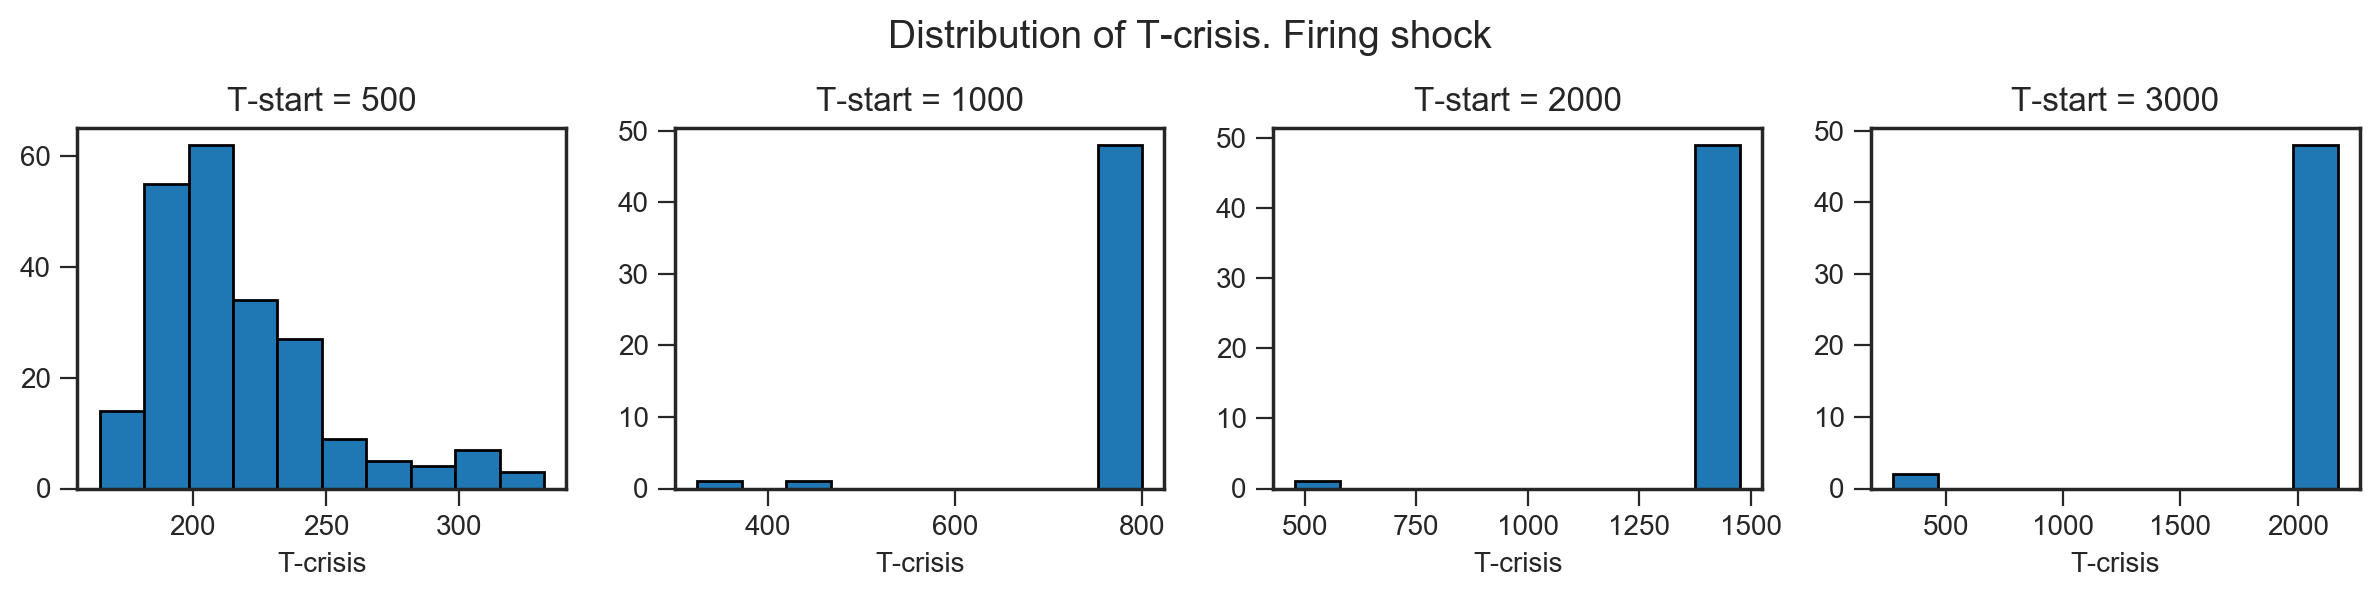

In [276]:
fig, ax = plt.subplots(1,4, dpi=200, figsize=(12,3))

p1 = ax[0].hist(crisis_times+crisis_times_quad, ec = "k", )
p2 = ax[1].hist(crisis_times_variable_seed_1000_firing, ec = "k", )
p3 = ax[2].hist(crisis_times_variable_seed_2000_firing, ec = "k", )
p4 = ax[3].hist(crisis_times_variable_seed_3000_firing, ec = "k",  )

t_starts = [500,1000, 2000, 3000]
for i in range(4):
    ax[i].set_title(f'T-start = {t_starts[i]}')
    ax[i].set_xlabel('T-crisis')
plt.tight_layout()
plt.suptitle('Distribution of T-crisis. Firing shock', fontsize=14)
plt.subplots_adjust(top=0.8)
fname = 't_crisis_dist_variable_seed_firing'
# plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

## Comparing situations 

1. Pure consumption 
2. Consumption + Firing 
3. Consumption + Firing + Hiring 
4. Consumption + Policy
5. Consumption + Firing + Policy
6. Consumption + Firing + Hiring + Policy

In [408]:
from runner_utils import *
print(len(h_cols))

31


In [409]:
len(pd.read_csv('output/cons_pure.txt', sep = "\t").columns)

31

In [486]:
# Pure consumption 

results_cons_pure = []
seeds = [474]
param_names = ['shockflag', 't_start', 't_end', 'seed']
param_values = [1, 1000, 1005, 0]

for seed in seeds:
    param_values[-1] = seed
    res = run_single_instance(1, param_names, param_values, './covid')
    results_cons_pure.append(res)

In [487]:
# Consumption + Firing 

results_firing = []
seeds = [474]
shockflag = 2
param_names = ['shockflag', 't_start', 't_end', 'seed']
param_values = [shockflag, 1000, 1005, 0]

for seed in seeds:
    param_values[-1] = seed
    res = run_single_instance(shockflag, param_names, param_values)
    results_firing.append(res)

In [488]:
# Consumption + Firing + Hiring 

results_fire_hire = []
seeds = [474]
shockflag = 3
param_names = ['shockflag', 't_start', 't_end', 'extra_start', 'extra_end', 'seed']
param_values = [shockflag, 1000, 1005,1005, 1010, 0]

for seed in seeds:
    param_values[-1] = seed
    res = run_single_instance(shockflag, param_names, param_values)
    results_fire_hire.append(res)

In [464]:
debt_ends = [1005, 1010, 1015]


In [489]:
# Consumption + Debt

results_cons_debt = []
seeds = [474]
shockflag = 4
param_names = ['shockflag', 't_start', 't_end', 'policy_start', 'policy_end', 'seed']
param_values = [shockflag, 1000, 1005,1000, 1005, 0]

for seed in seeds:
    result_intermediate = []
    param_values[-1] = seed
    for debt_end in debt_ends:
        param_values[-2] = debt_end
        print(generate_param_list(param_names, param_values))
        res = run_single_instance(shockflag, param_names, param_values)
        result_intermediate.append(res)
    results_cons_debt.append(result_intermediate)

./hello --shockflag=4  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1005  --seed=474 
./hello --shockflag=4  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1010  --seed=474 
./hello --shockflag=4  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1015  --seed=474 


In [491]:
# Consumption + Firing + Debt 

results_fire_debt = []
seeds = [474]
shockflag = 5
param_names = ['shockflag', 't_start', 't_end', 'policy_start', 'policy_end', 'seed']
param_values = [shockflag, 1000, 1005,1000, 1005, 0]

for seed in seeds:
    result_intermediate = []
    param_values[-1] = seed
    for debt_end in debt_ends:
        param_values[-2] = debt_end
        print(generate_param_list(param_names, param_values))
        res = run_single_instance(shockflag, param_names, param_values)
        result_intermediate.append(res)
    results_fire_debt.append(result_intermediate)

./hello --shockflag=5  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1005  --seed=474 
./hello --shockflag=5  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1010  --seed=474 
./hello --shockflag=5  --t_start=1000  --t_end=1005  --policy_start=1000  --policy_end=1015  --seed=474 


In [492]:
# Consumption + Firing + Hiring + Debt 

results_fire_hire_debt = []
seeds = [474]
shockflag = 6
param_names = ['shockflag', 't_start', 't_end', 'extra_start', 'extra_end', 'policy_start', 'policy_end', 'seed']
param_values = [shockflag, 1000, 1005,1005, 1010, 1000, 1005, 0]

for seed in seeds:
    result_intermediate = []
    param_values[-1] = seed
    for debt_end in debt_ends:
        param_values[-2] = debt_end
        print(generate_param_list(param_names, param_values))
        res = run_single_instance(shockflag, param_names, param_values)
        result_intermediate.append(res)
    results_fire_hire_debt.append(result_intermediate)

./hello --shockflag=6  --t_start=1000  --t_end=1005  --extra_start=1005  --extra_end=1010  --policy_start=1000  --policy_end=1005  --seed=474 
./hello --shockflag=6  --t_start=1000  --t_end=1005  --extra_start=1005  --extra_end=1010  --policy_start=1000  --policy_end=1010  --seed=474 
./hello --shockflag=6  --t_start=1000  --t_end=1005  --extra_start=1005  --extra_end=1010  --policy_start=1000  --policy_end=1015  --seed=474 


In [493]:
first_row = [results_cons_pure, results_firing, results_fire_hire]
next_rows = [results_cons_debt, results_fire_debt, results_fire_hire_debt]

In [494]:
# row_labels=['No policy']
row_labels = [f'Debt-end = {debt_end}' for debt_end in debt_ends]

In [495]:
row_labels

['Debt-end = 1005', 'Debt-end = 1010', 'Debt-end = 1015']

In [496]:
main_headings = ['Pure Consumption', 'Firing', 'Fire + Hire']
for i,j in zip(main_headings, row_labels):
    print(i+' ' +j)

Pure Consumption Debt-end = 1005
Firing Debt-end = 1010
Fire + Hire Debt-end = 1015


In [497]:
# import pickle
# all_data = [results_cons_pure, results_firing, results_fire_hire,
#            results_cons_debt, results_fire_debt, results_fire_hire_debt]
# fname = 'results_1000.pl'
# with open (fname,'wb') as f:
#     pickle.dump(all_data,f )

In [498]:
?find_intersection

In [502]:
find_intersection(results_firing[0]['u'][1001:], 0.1)

(array([1]), array([0]))

complete_scenarios_output_short_crisis_updated


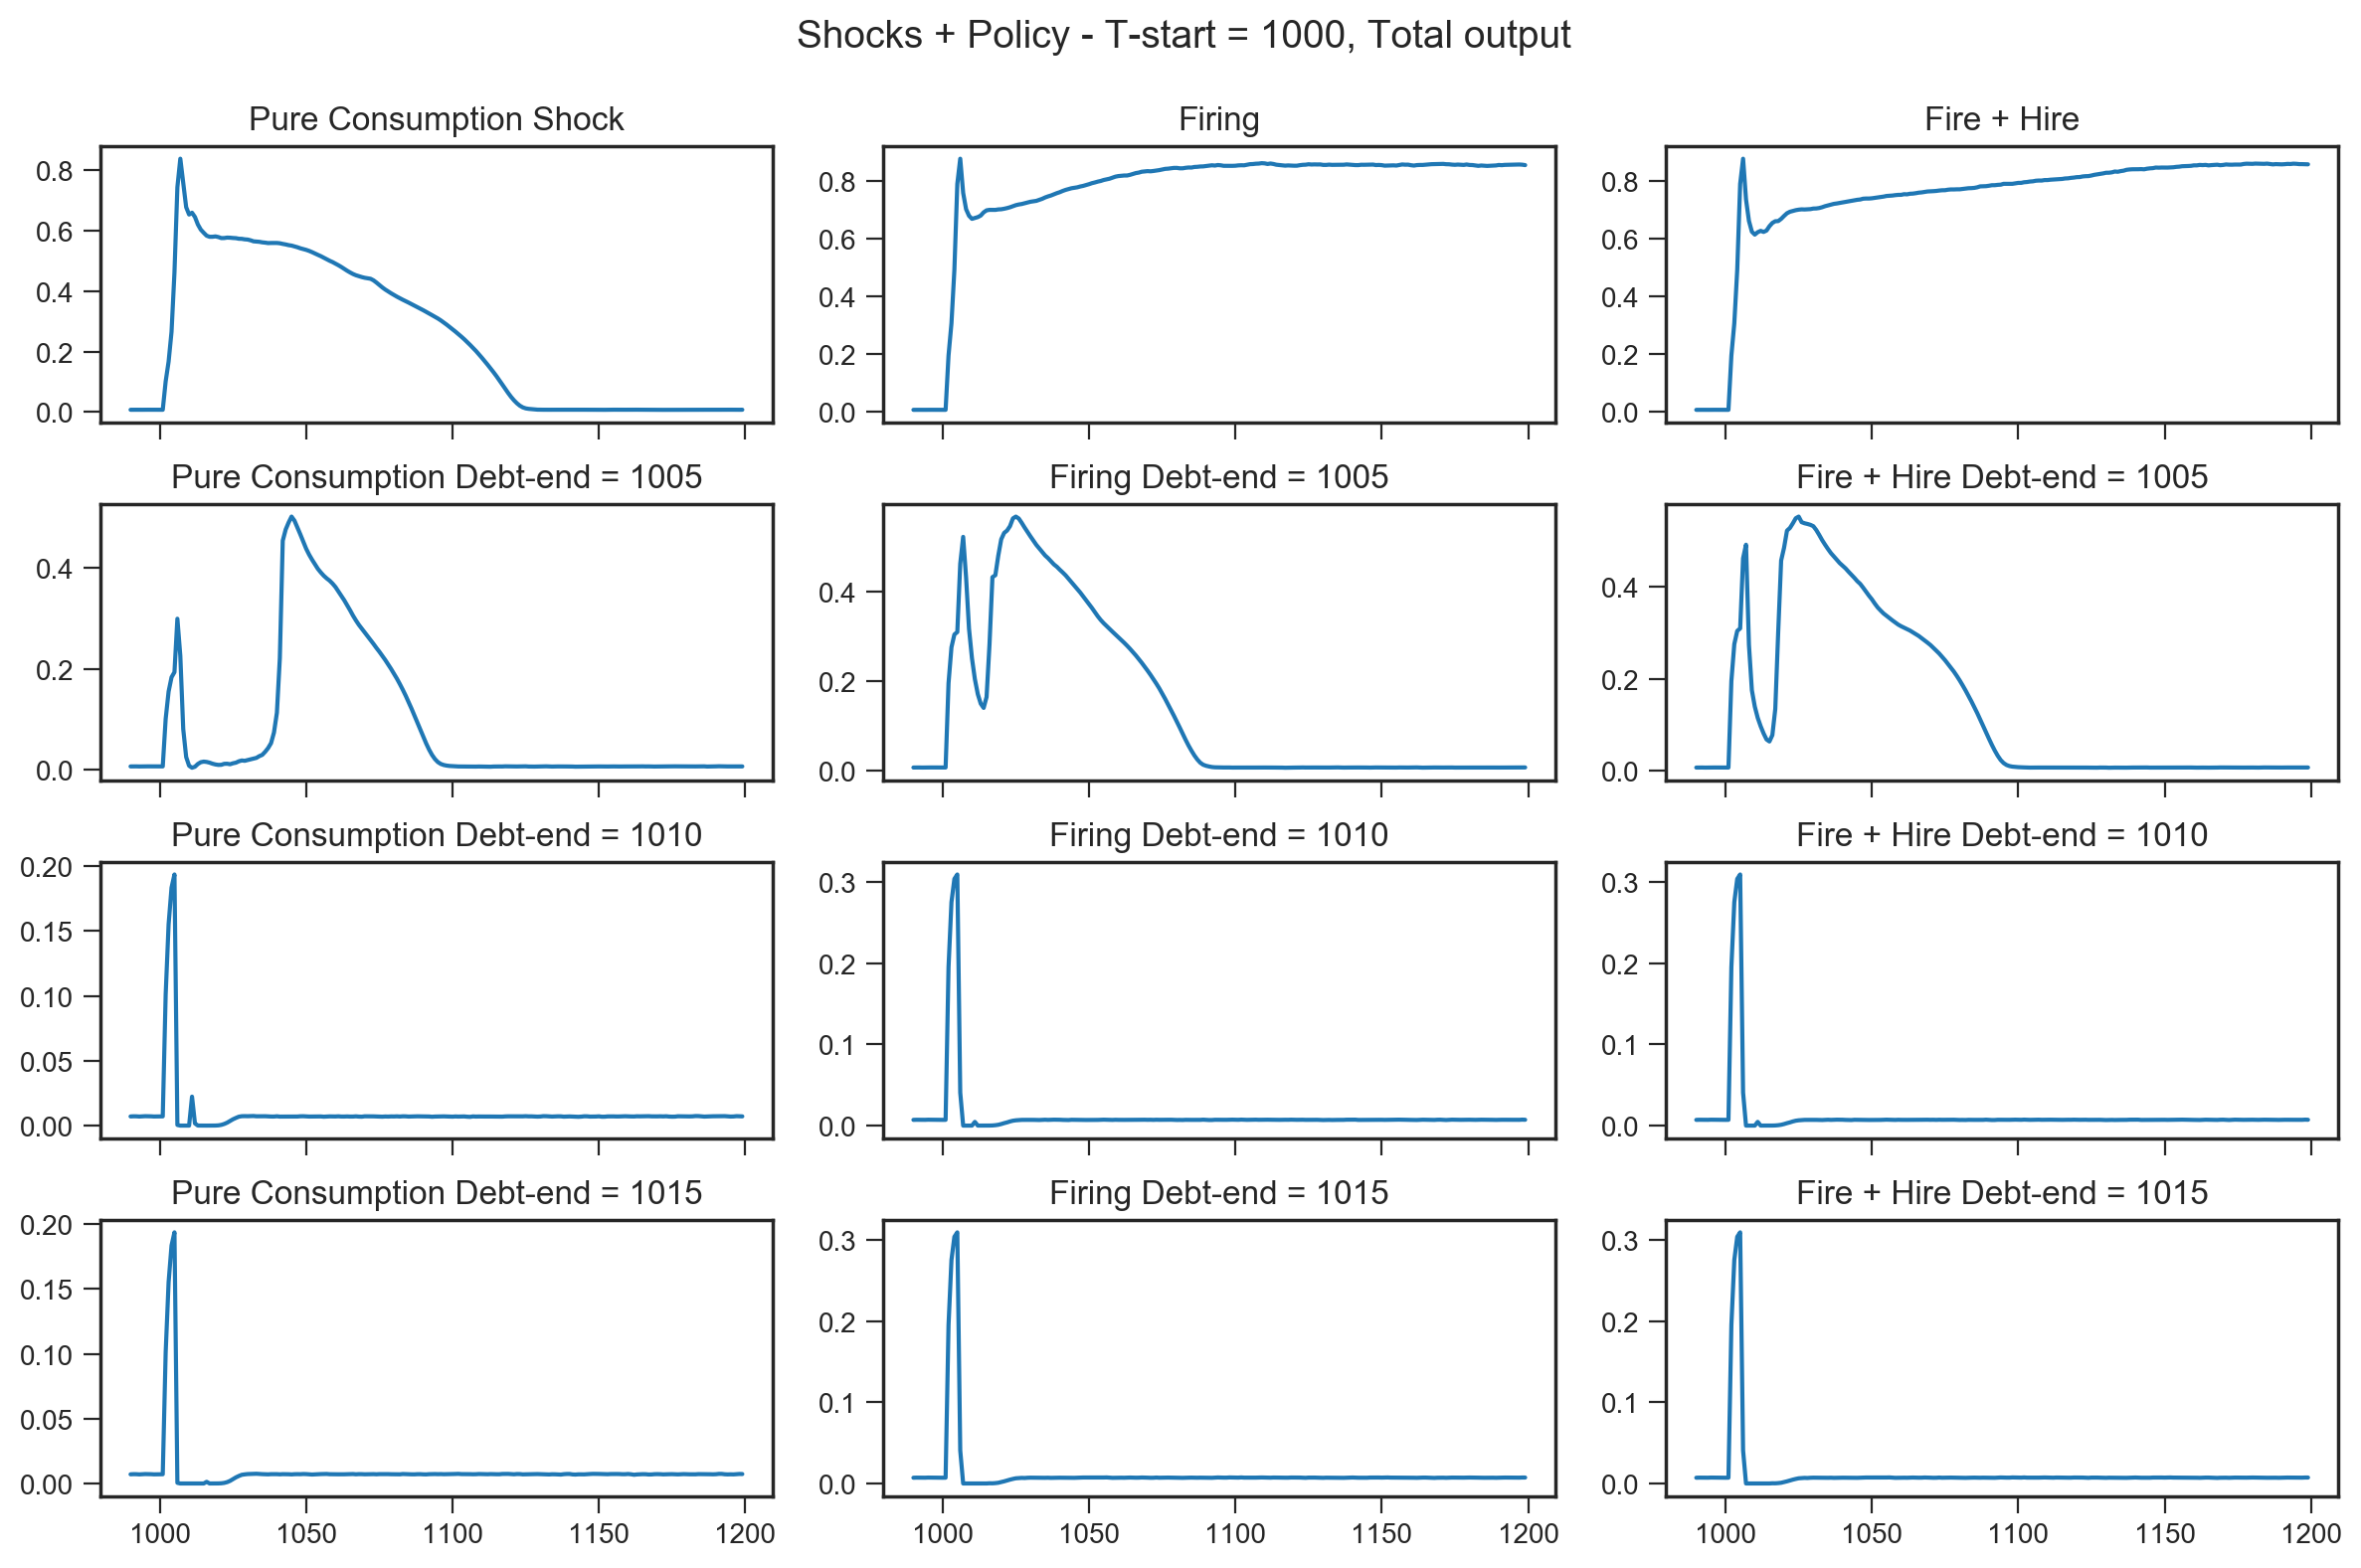

In [523]:
f, ax = plt.subplots(4,3, dpi = 200, figsize=(12,8), sharex = 'col')
fd = 990
td = 1200
seed = 0
col_name = 'u'
ax[0,0].plot(first_row[0][seed][col_name][fd:td])
ax[0,0].set_title('Pure Consumption Shock')

for i in range(1,3):
    ax[0,i].plot(first_row[i][seed][col_name][fd:td])
    ax[0,i].set_title(main_headings[i])
for i in range(1,4):
    ax[i,0].plot(results_cons_debt[seed][i-1][col_name][fd:td])
    ax[i,0].set_title(main_headings[0] + ' ' +row_labels[i-1])
    
    ax[i,1].plot(results_fire_debt[seed][i-1][col_name][fd:td])
    ax[i,1].set_title(main_headings[1] + ' ' +row_labels[i-1])
    
    ax[i,2].plot(results_fire_hire_debt[seed][i-1][col_name][fd:td])
    ax[i,2].set_title(main_headings[2] + ' ' +row_labels[i-1])
pad = 5
# for axis, row in zip(ax[:,0], row_labels):
#     axis.annotate(row, xy=(0, -0.5), xytext=(-axis.yaxis.labelpad - pad, 2),
#                 xycoords=axis.yaxis.label, textcoords='offset points')

plt.tight_layout()
plt.suptitle(f'Shocks + Policy - T-start = 1000, Total output', fontsize=14)
plt.subplots_adjust(top = 0.9)

fname = f'complete_scenarios_output_short_crisis_updated'
print(fname)
plt.savefig(os.path.join('..', path_plots, fname + '.pdf'), bbox_inches='tight', pad_inches = 0.03)

## Distributions of T-crisis

In [305]:
stats_names = [f'stats_{flagname}_' for flagname in flagnames[1:]]
t_starts = [500, 1000, 1500, 2000, 3000]

In [306]:
os.getcwd()

'/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build'

In [503]:
os.path.join('..', 'output', stats_names[1]+f'{t_starts[1]}' + '.csv')

'../output/stats_firing_shock_1000.csv'

In [517]:
tmp_df = pd.read_csv(os.path.join('..', 'output', stats_names[4]+f'{t_starts[1]}' + '.csv'), sep="\t")

In [521]:
tmp_df.loc[tmp_df.seed == 2]

between  first-crisis  is_error  second-crisis  seed  total
214      -88            89         0             88   2.0     89

In [387]:
row_labels = flagnames[1:4]

In [388]:
row_labels

['cons_pure', 'firing_shock', 'fire_hire']

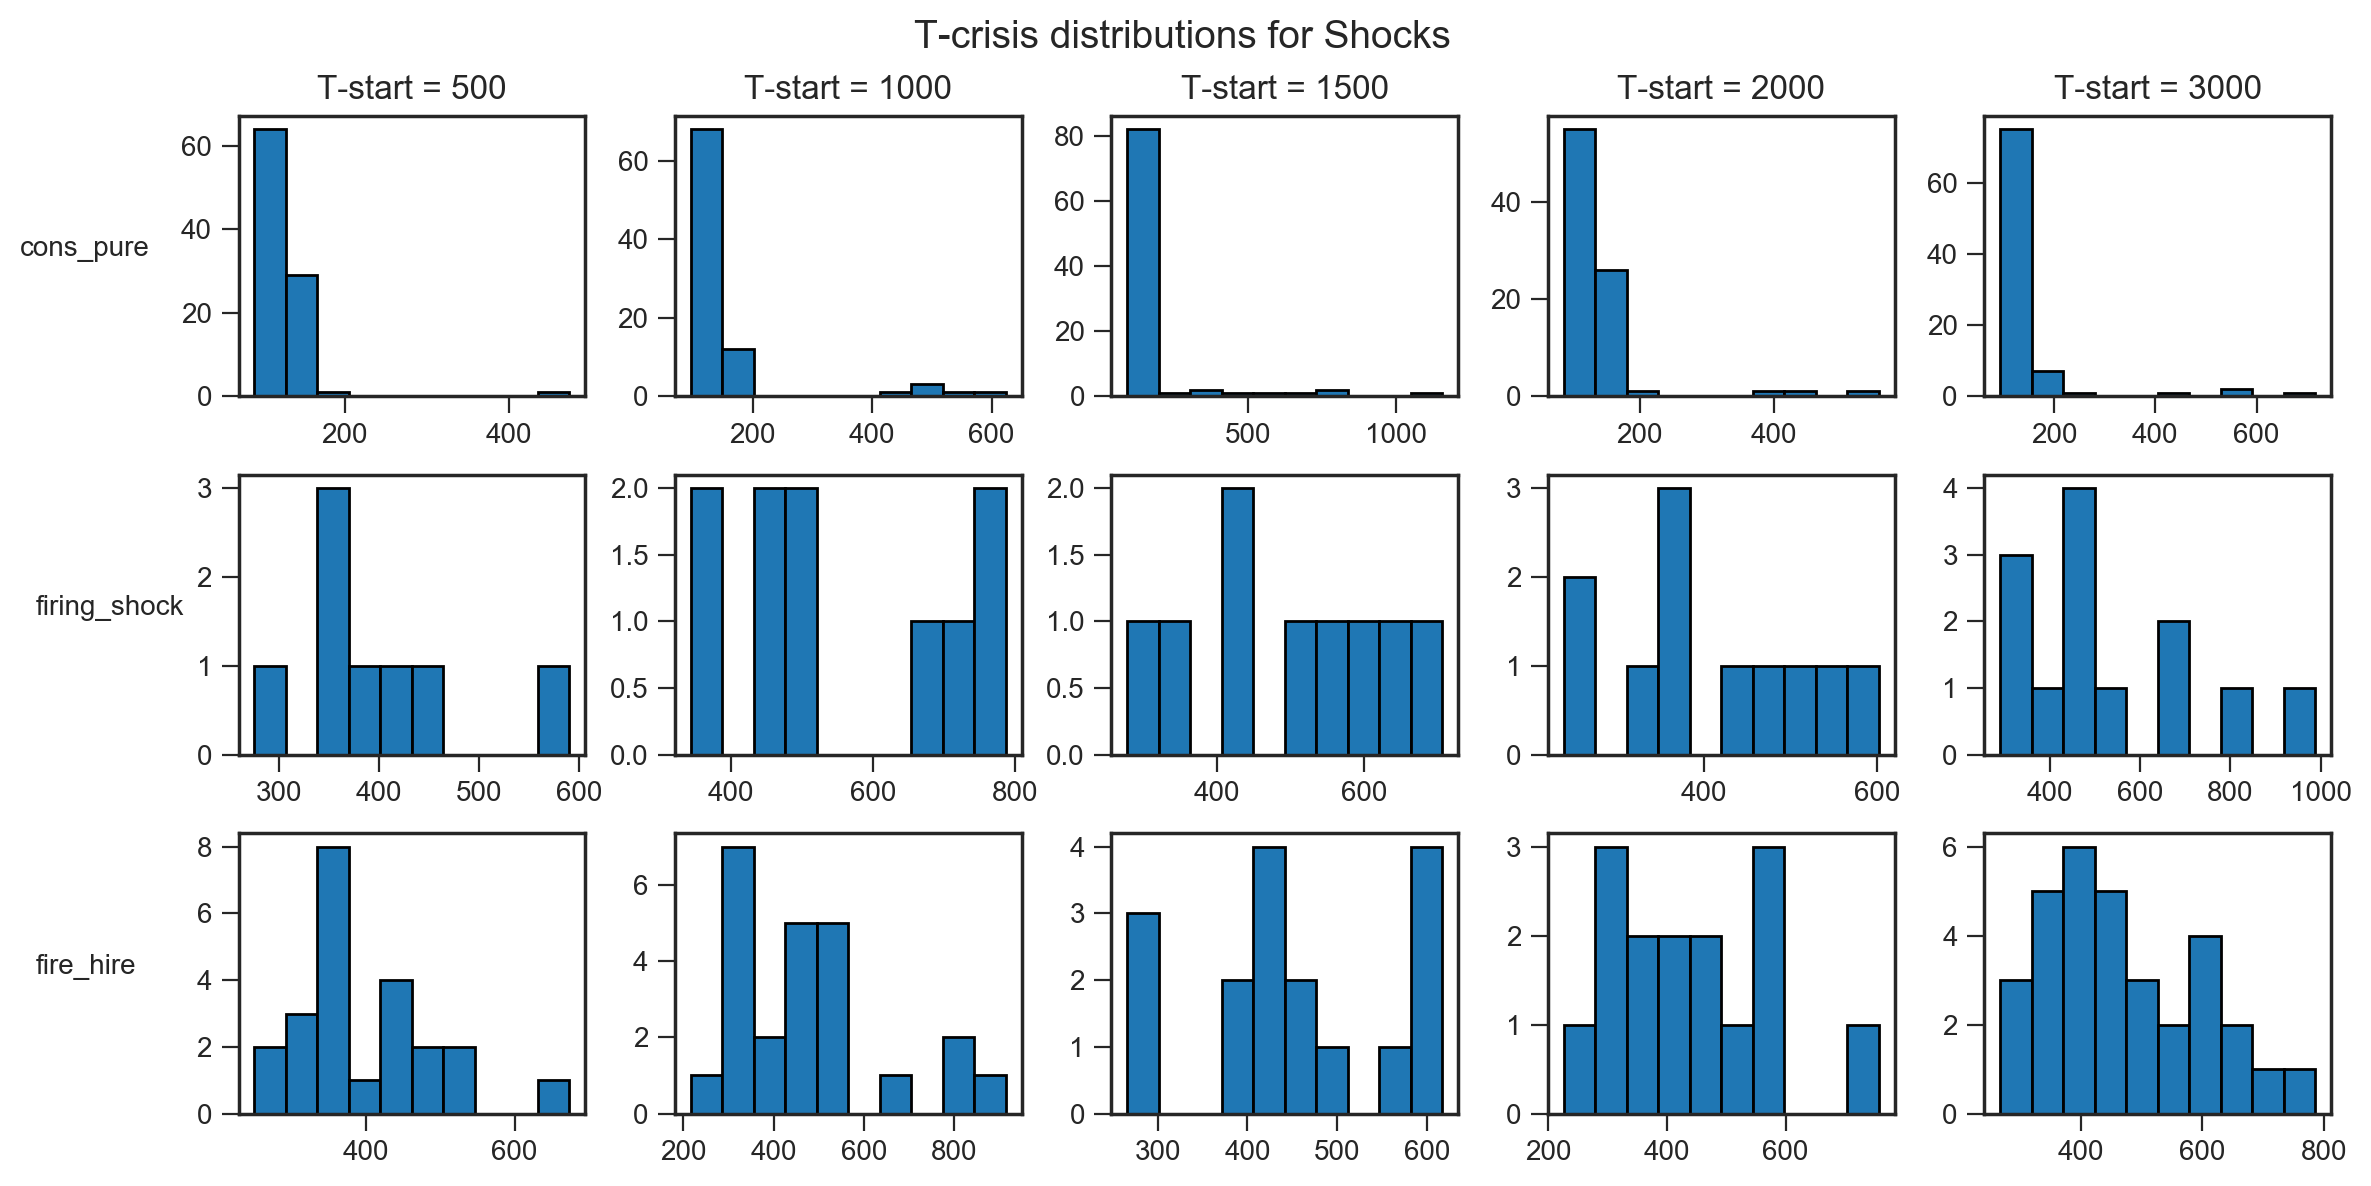

In [389]:
t_starts = [500, 1000, 1500, 2000, 3000]
ncols = len(t_starts)
nrows = 3
start_list = []
error_rate_list = []
flag_name_list = []
f,ax = plt.subplots(nrows, ncols, dpi=200, figsize=(12,6), )
for i in range(ncols):
    ax[0,i].set_title(f'T-start = {t_starts[i]}')
for i in range(nrows):
    for j in range(ncols):
        fname = stats_names[i] + f'{t_starts[j]}.csv'
        start_list.append(t_starts[j])
        flag_name_list.append(flagnames[i+1])
        
        tmp_df = pd.read_csv(os.path.join('..', 'output', fname), sep="\t")
        error_rate = tmp_df.error.mean()
        error_rate_list.append(error_rate)
        small_samples = tmp_df[tmp_df.error!=1]['error'].size
#         print('error={0:.2f}'.format(tmp_df.error.sum()/tmp_df.error.size))
        p=ax[i,j].hist(tmp_df[tmp_df.error !=1].crisis, ec = "k", density = False, )
#         plt.text(0.5, 0.5,', horizontalalignment='center',verticalalignment='center', transform = ax[i,j].transAxes)
pad = 50
for ax, row in zip(ax[:,0], row_labels):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points')
        
plt.tight_layout()
plt.suptitle('T-crisis distributions for Shocks', fontsize=14)
plt.subplots_adjust(top=0.9)
fname = 't_crisis_szero_distribs_updated'

plt.savefig(os.path.join('..', path_plots,fname+'.pdf'))

In [362]:
error_rate_df = pd.DataFrame({
    'flag': flag_name_list,
    'T-start': start_list,
    'error-rate': error_rate_list
})

In [363]:
error_rate_df

flag  T-start  error-rate
0      cons_pure      500    0.716418
1      cons_pure     1000    0.748538
2      cons_pure     1500    0.733138
3      cons_pure     2000    0.742424
4      cons_pure     3000    0.742604
5   firing_shock      500    0.963801
6   firing_shock     1000    0.952607
7   firing_shock     1500    0.958904
8   firing_shock     2000    0.947368
9   firing_shock     3000    0.939815
10     fire_hire      500    0.924590
11     fire_hire     1000    0.921053
12     fire_hire     1500    0.943709
13     fire_hire     2000    0.949324
14     fire_hire     3000    0.900621

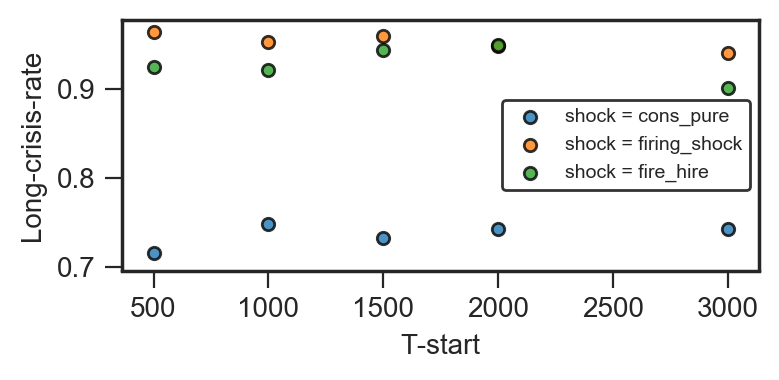

In [366]:
f,ax = plt.subplots(1,1, figsize=(4,2), dpi=200)
for i in range(1,4):
    ax.scatter(error_rate_df[error_rate_df.flag == flagnames[i]]['T-start'], 
           error_rate_df[error_rate_df.flag == flagnames[i]]['error-rate'], s = 20, ec = "k", alpha=0.8,
              label = f'shock = {flagnames[i]}')
leg=ax.legend(prop={'size':7}, frameon=True)
ax.set_xlabel('T-start')
ax.set_ylabel('Long-crisis-rate')
leg.get_frame().set_edgecolor('k')
plt.tight_layout()
fname = 'long_crisis_rate_szero_updated'
plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

In [390]:
row_labels = flagnames[4:]

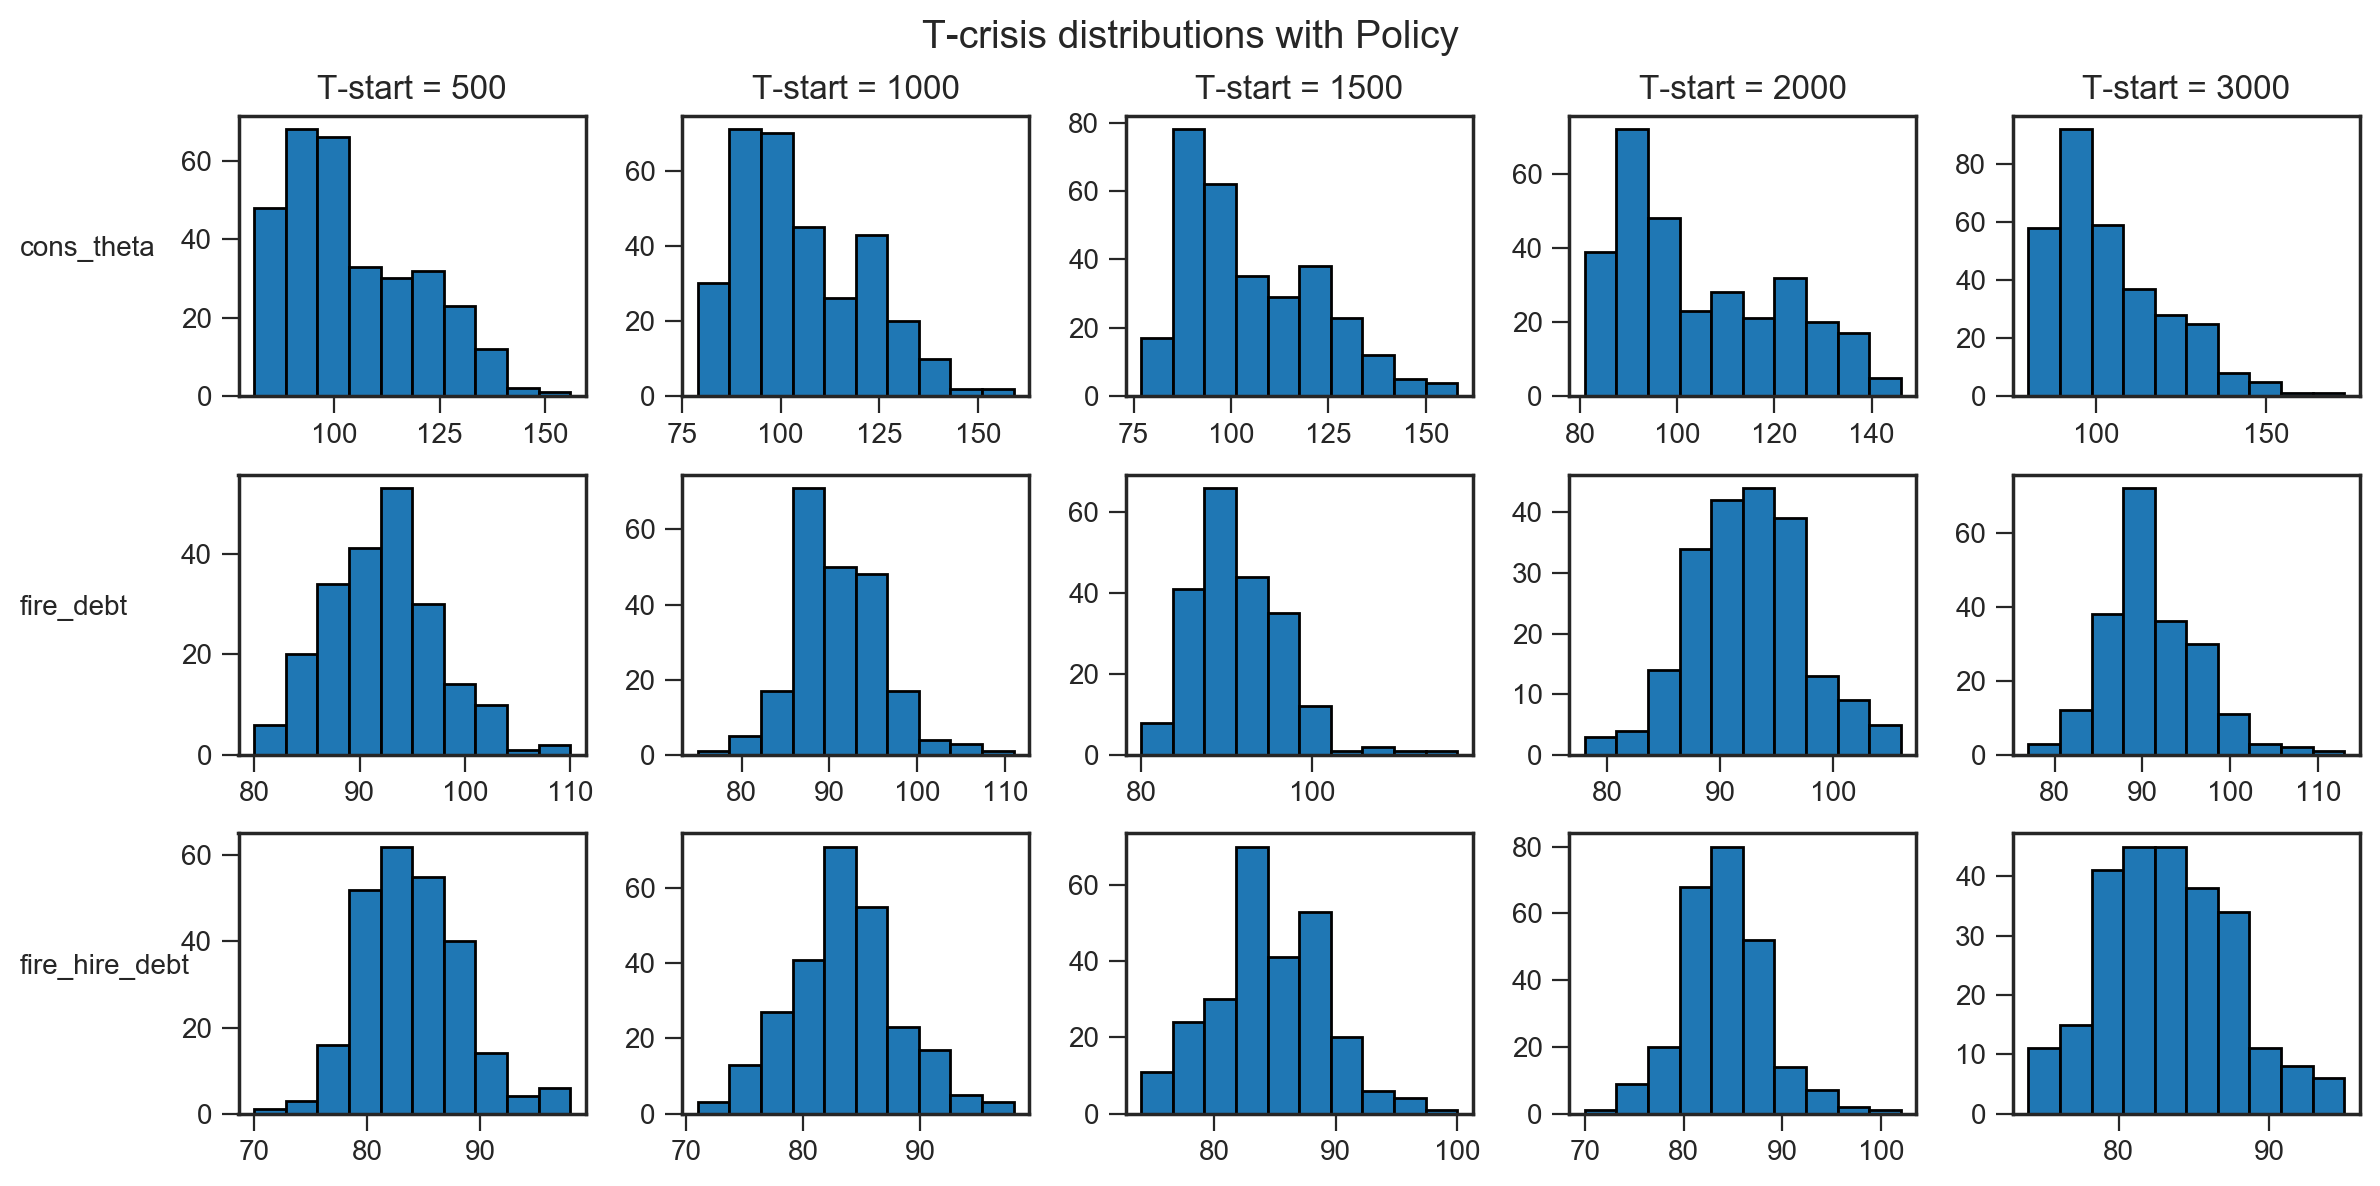

In [393]:
ncols = len(t_starts)
nrows = 3
start_list = []
error_rate_list = []
flag_name_list = []
f,ax = plt.subplots(nrows, ncols, dpi=200, figsize=(12,6), )
for i in range(ncols):
    ax[0,i].set_title(f'T-start = {t_starts[i]}')
for i in range(nrows):
    for j in range(ncols):
        fname = stats_names[i+3] + f'{t_starts[j]}.csv'
        tmp_df = pd.read_csv(os.path.join('..', 'output', fname), sep="\t")
        
        start_list.append(t_starts[j])
        flag_name_list.append(flagnames[i+1+3])
        error_rate_list.append(tmp_df['is_error'].mean())

        p=ax[i,j].hist(tmp_df[tmp_df.is_error !=1].total, ec = "k", density = False)
#         plt.text(0.5, 0.5,'error={0:.2f}'.format(tmp_df.error.sum()/tmp_df.error.size), horizontalalignment='center',verticalalignment='center', transform = ax[i,j].transAxes)
pad = 50
for ax, row in zip(ax[:,0], row_labels):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points')
        
plt.tight_layout()
plt.suptitle('T-crisis distributions with Policy', fontsize=14)
plt.subplots_adjust(top=0.9)
fname = 't_crisis_szero_distribs_bis_updated'
plt.savefig(os.path.join('..', path_plots,fname+'.pdf'))

In [376]:
error_rate_policy_df = pd.DataFrame({
    'flag': flag_name_list,
    'T-start': start_list,
    'error-rate': error_rate_list
})

In [377]:
error_rate_policy_df

flag  T-start  error-rate
0       cons_theta      500         0.0
1       cons_theta     1000         0.0
2       cons_theta     1500         0.0
3       cons_theta     2000         0.0
4       cons_theta     3000         0.0
5        fire_debt      500         0.0
6        fire_debt     1000         0.0
7        fire_debt     1500         0.0
8        fire_debt     2000         0.0
9        fire_debt     3000         0.0
10  fire_hire_debt      500         0.0
11  fire_hire_debt     1000         0.0
12  fire_hire_debt     1500         0.0
13  fire_hire_debt     2000         0.0
14  fire_hire_debt     3000         0.0

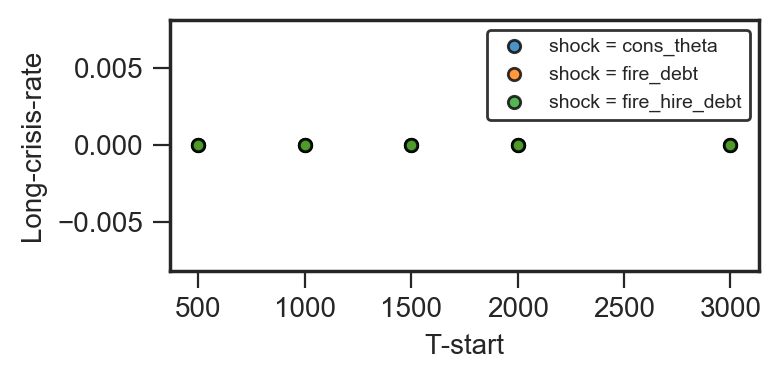

In [380]:
f,ax = plt.subplots(1,1, figsize=(4,2), dpi=200)
for i in range(1,4):
    ax.scatter(error_rate_policy_df[error_rate_policy_df.flag == flagnames[i+3]]['T-start'], 
           error_rate_policy_df[error_rate_policy_df.flag == flagnames[i+3]]['error-rate'], s = 20, ec = "k", alpha=0.8,
              label = f'shock = {flagnames[i+3]}')
leg=ax.legend(prop={'size':7}, frameon=True)
ax.set_xlabel('T-start')
ax.set_ylabel('Long-crisis-rate')
leg.get_frame().set_edgecolor('k')
plt.tight_layout()
fname = 'long_crisis_rate_szero_policy_updated'
plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

In [318]:
crisis_times = run_with_different_start_time(shockflag=1, nb_runs=150, seed_default=0)

T-start = 500, t-final = 148
T-start = 510, t-final = error,
T-start = 520, t-final = 2416
T-start = 530, t-final = error,
T-start = 540, t-final = error,
T-start = 550, t-final = 157
T-start = 560, t-final = error,
T-start = 570, t-final = error,
T-start = 580, t-final = 222
T-start = 590, t-final = 252
T-start = 600, t-final = error,
T-start = 610, t-final = error,
T-start = 620, t-final = 308
T-start = 630, t-final = error,
T-start = 640, t-final = error,
T-start = 650, t-final = error,
T-start = 660, t-final = error,
T-start = 670, t-final = 293
T-start = 680, t-final = 307
T-start = 690, t-final = error,
T-start = 700, t-final = error,
T-start = 710, t-final = error,
T-start = 720, t-final = error,
T-start = 730, t-final = error,
T-start = 740, t-final = error,
T-start = 750, t-final = error,
T-start = 760, t-final = error,
T-start = 770, t-final = error,
T-start = 780, t-final = error,
T-start = 790, t-final = 2662
T-start = 800, t-final = error,
T-start = 810, t-final = 473
T-st

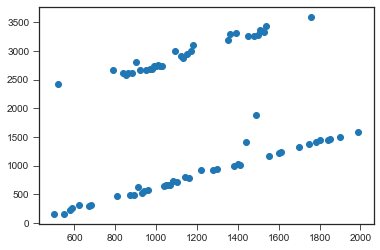

In [321]:
plt.scatter(crisis_times[crisis_times.error !=1]['t-start'], crisis_times[crisis_times.error!=1].crisis)

In [393]:
res = read_output([fnames[1]], h_cols)[flagnames[1]]

In [497]:
true_indices = np.where(crisis_times.error !=1)[0]
t_starts = crisis_times['t-start'][true_indices]

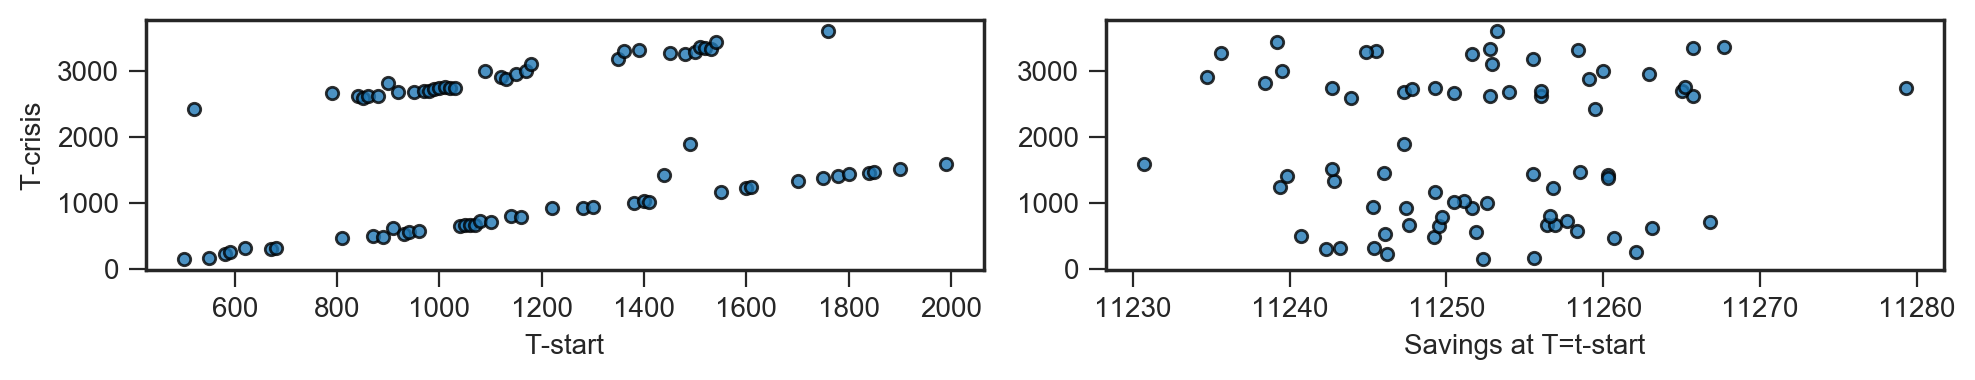

In [499]:
f,ax = plt.subplots(1,2, dpi=200, figsize=(10,2))
ax[0].scatter(t_starts, crisis_times[crisis_times.error!=1].crisis,
             s=20, ec = "k", alpha = 0.8)
# ax[0].scatter(crisis_times[crisis_times.error !=1]['t-start'], crisis_times[crisis_times.error!=1].crisis,
#              s=20, ec = "k", alpha = 0.8)
ax[0].set_xlabel('T-start')
ax[0].set_ylabel('T-crisis')
ax[1].scatter(res['S'][t_starts],crisis_times[crisis_times.error!=1].crisis,s=20, ec = "k", alpha = 0.8)
ax[1].set_xlabel('Savings at T=t-start')

plt.tight_layout()
fname = 'dependence_szero_t-crisis'
plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

In [6]:
param_names = ['seed', 'shockflag', 't_start', 't_end',]
param_values = [0, 1, 1000, 1005]
results_1000 = []
for i in range(9):
    param_values[0] = i
    output = run_program_default(param_names, param_values, './covid')
    results_1000.append(read_output([fnames[1]], h_cols)[flagnames[1]])
    

In [7]:
param_names = ['seed', 'shockflag', 't_start', 't_end',]
param_values = [0, 1, 2000, 2005]
results_2000 = []
for i in range(9):
    param_values[0] = i
    output = run_program_default(param_names, param_values, './covid')
    results_2000.append(read_output([fnames[1]], h_cols)[flagnames[1]])

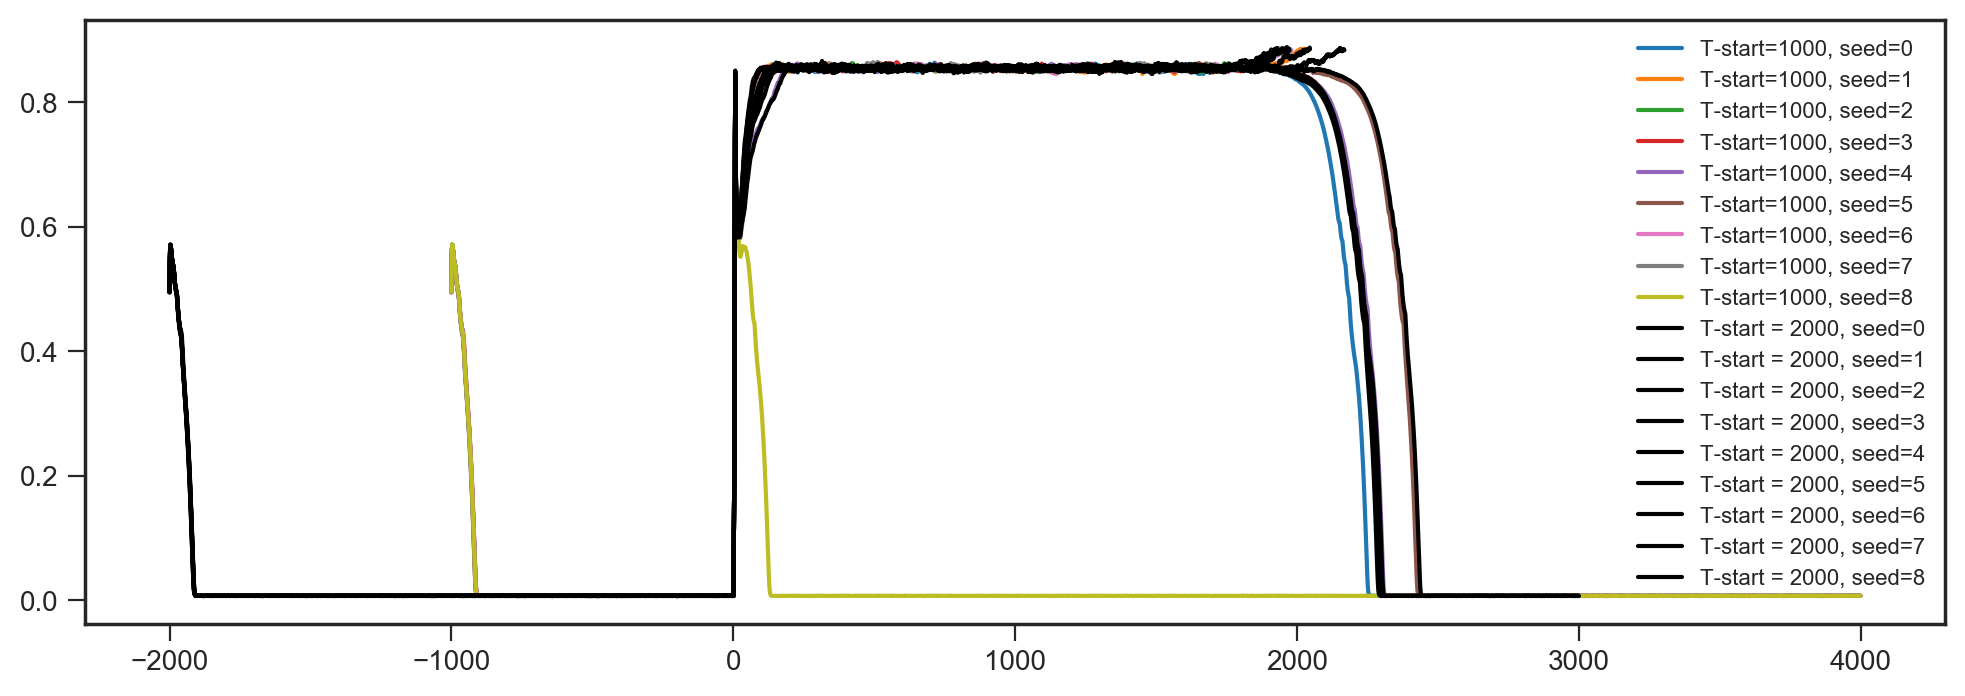

In [8]:
f, ax = plt.subplots(1,1, dpi=200,figsize=(12,4))

## plot for 1000
for i in range(9):
    y = np.arange(len(results_1000[i]['u']))
    y -= 1000
    ax.plot(y, results_1000[i]['u'], label = f'T-start=1000, seed={i}')
#     ax.plot(y, results_1000[i][['S', 'Atot']].sum(1), label = f'T-start=1000, seed={i}')
for i in range(9):
    y = np.arange(len(results_2000[i]['u']))
    y -= 2000
    ax.plot(y, results_2000[i]['u'],c="k", label = f'T-start = 2000, seed={i}')
    
ax.legend(prop = {'size': 8})
fname = 'reproduce_stan_results'
# plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

Text(0.5, 1.0, 'Savings + Atot')

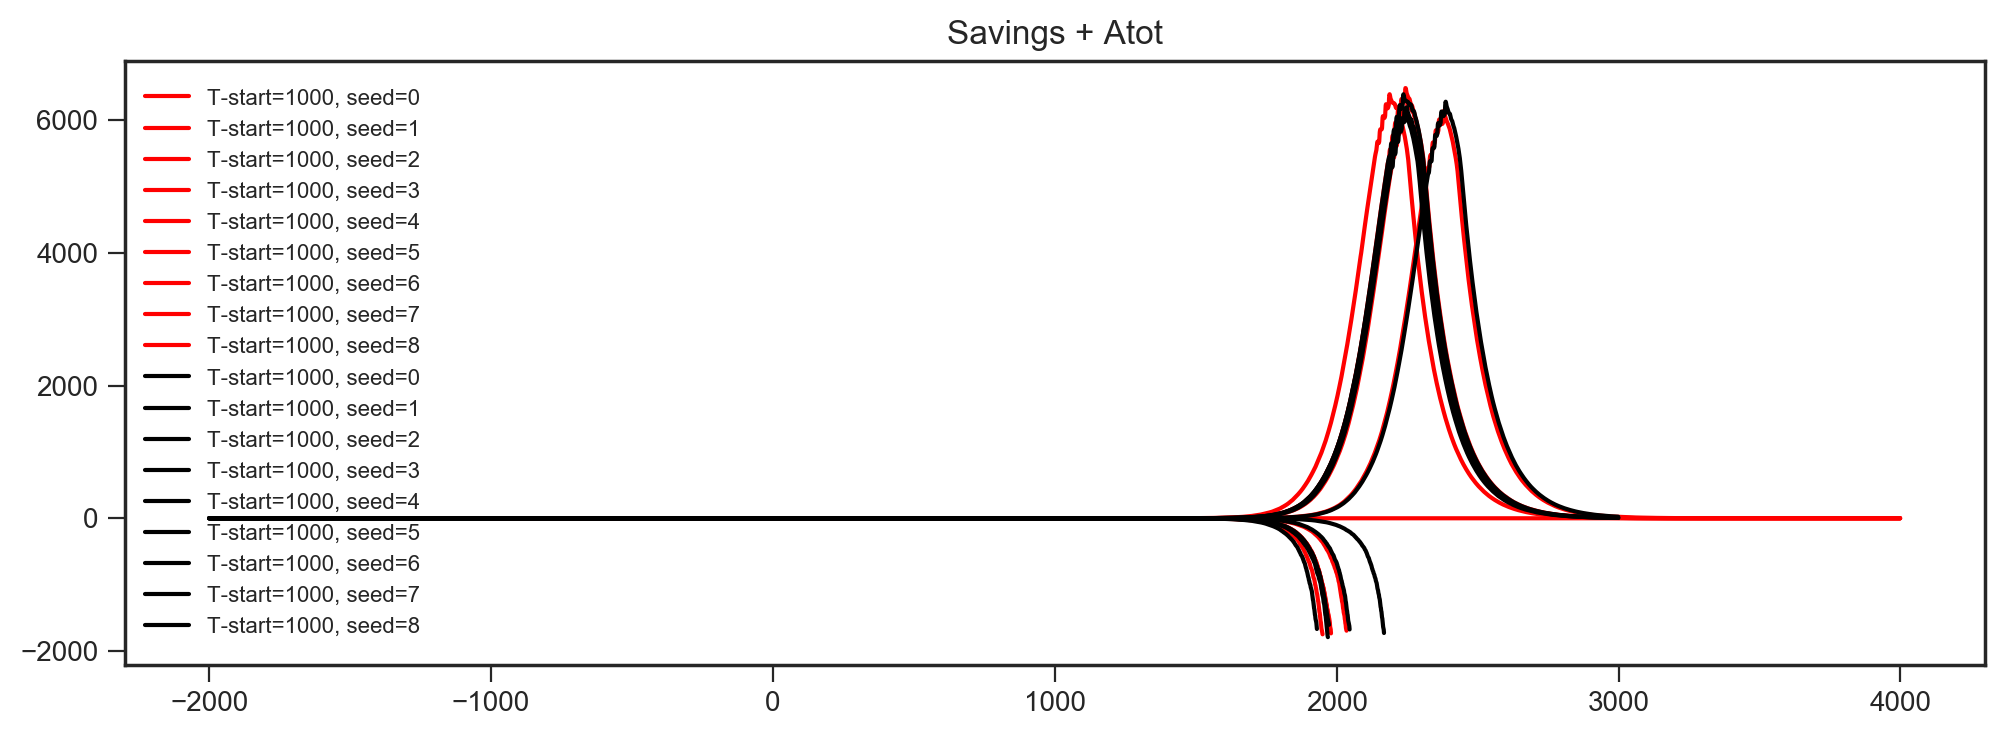

In [9]:
f, ax = plt.subplots(1,1, dpi=200,figsize=(12,4))

## plot for 1000
for i in range(9):
    y = np.arange(len(results_1000[i]['u']))
    y -= 1000
#     ax.plot(y, results_1000[i]['u'], c="r", label = f'T-start=1000, seed={i}')
    ax.plot(y, results_1000[i][['S', 'Atot']].sum(1),c="r",   label = f'T-start=1000, seed={i}')
for i in range(9):
    y = np.arange(len(results_2000[i]['u']))
    y -= 2000
    ax.plot(y, results_2000[i][['S', 'Atot']].sum(1), c="k", label = f'T-start=1000, seed={i}')

ax.legend(prop = {'size': 8}, loc = 'center left')
fname = 'reproduce_stan_results_sum_money'
ax.set_title('Savings + Atot')
# plt.savefig(os.path.join('..',path_plots, fname+'.pdf'))

comparison_urate_s_stan_results_seed_3


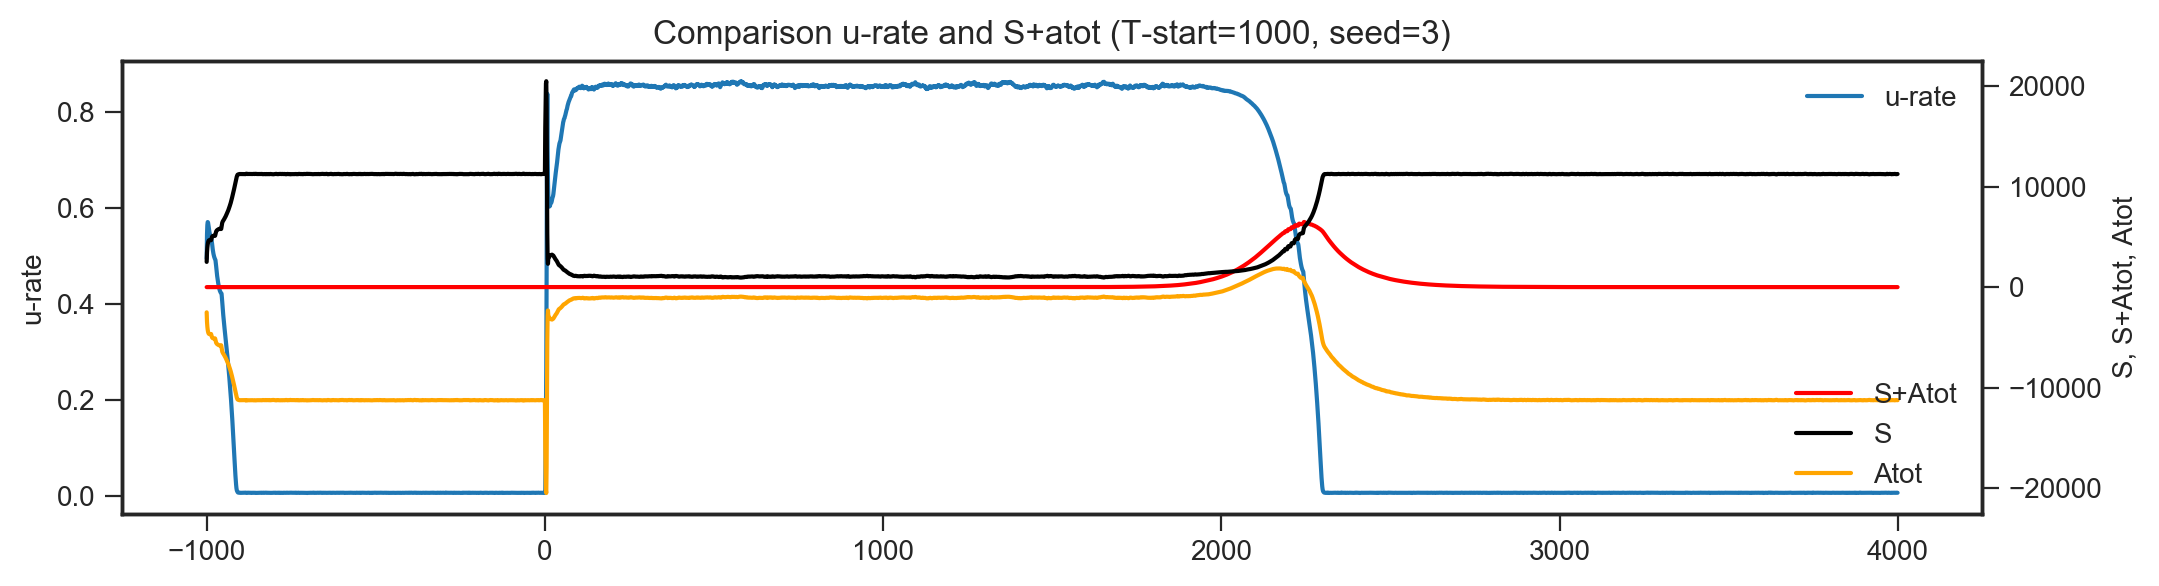

In [32]:
f,ax = plt.subplots(1,1, dpi=200, figsize=(12,3))

seed = 3
y = np.arange(len(results_1000[seed]['u']))
y -= 1000
ax.plot(y, results_1000[seed]['u'], label = 'u-rate')
ax.legend()
ax.set_ylabel('u-rate')
ax2 = ax.twinx()
ax2.plot(y, results_1000[seed]['S'] + results_1000[seed]['Atot'], c = "r", label = 'S+Atot')
ax2.plot(y,results_1000[seed]['S'], c="k", label = "S")
# ax2.set_yscale('log')
ax2.plot(y,results_1000[seed]['Atot'], c="orange", label = "Atot")
ax2.set_ylabel('S, S+Atot, Atot')
ax2.legend(loc = 'lower right')

ax.set_title('Comparison u-rate and S+atot (T-start=1000, seed={})'.format(seed))
fname = 'comparison_urate_s_stan_results_seed_{}'.format(seed)
print(fname)
# plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

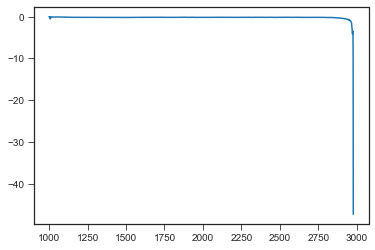

In [55]:
plt.plot(results_1000[7]['rhop'][999:])

comparison_urate_s_stan_results_zoom_seed_3


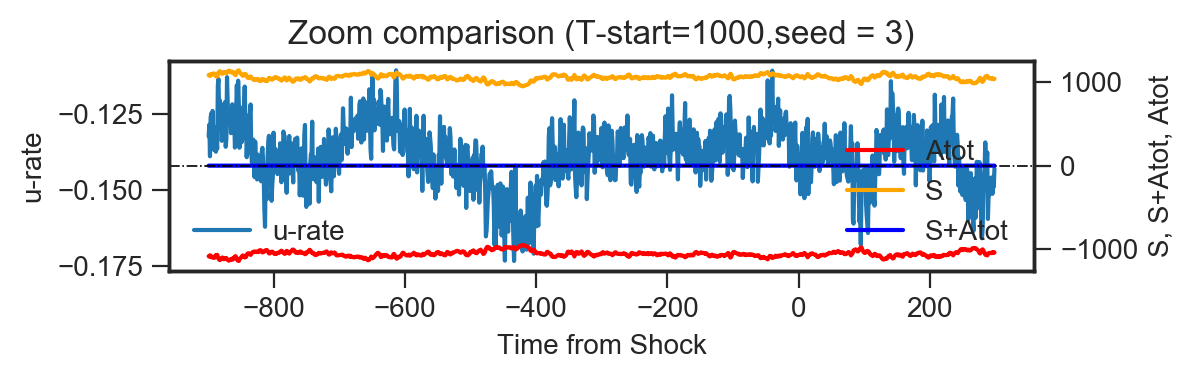

In [38]:
f,ax = plt.subplots(1,1,dpi=200, figsize=(6,2))
to_plot = results_1000[seed]['rhop']
y = np.arange(len(to_plot))
y-= 1000
lowerlim=100
offset=1200
ax.plot(y[lowerlim:lowerlim+offset], to_plot[lowerlim+1000:lowerlim+1000+offset], label = 'u-rate')
ax.set_xlabel('Time from Shock')
ax.set_ylabel('u-rate')
ax2 = ax.twinx()
ax2.plot( y[lowerlim:lowerlim+offset], results_1000[seed]['Atot'][lowerlim+1000:lowerlim+1000+offset],c="r", label = 'Atot')
ax2.plot( y[lowerlim:lowerlim+offset], results_1000[seed]['S'][lowerlim+1000:lowerlim+1000+offset],c="orange" , label = 'S')
ax2.plot( y[lowerlim:lowerlim+offset], results_1000[seed][['S', 'Atot']][lowerlim+1000:lowerlim+1000+offset].sum(1),c="blue" , label = 'S+Atot')


# ax.plot( y[1900:2300], results_1000[seed]['Ytot'][2900:3300], )
ax2.axhline(0, c="k", ls='-.', lw = 0.6)
ax.legend()
ax2.legend(loc = 'lower right')
ax2.set_ylabel('S, S+Atot, Atot')

# plt.plot(results_1000[seed]['S'][2000:3500])
ax.set_title(f'Zoom comparison (T-start=1000,seed = {seed})')

fname = 'comparison_urate_s_stan_results_zoom_seed_{}'.format(seed)
print(fname)
plt.tight_layout()
# plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

## Computing probability of long-crisis

In [35]:
complete_df = pd.read_csv(os.path.join( '..', 'output', 'long_crisis_rate_new_cons_theta.csv'), sep = "\t",)

In [36]:
def get_long_crisis_rate(length, factor, df = complete_df):
    filtered_df = df[(df['factor'] == factor) & (df['length'] == length) & (df['is-crisis'] !=0)]
    if filtered_df.size > 0:
        return filtered_df.error.mean(), filtered_df[filtered_df.error !=1]['T-crisis'].mean(), filtered_df[filtered_df['T-crisis']>1000]['T-crisis'].size
    else:
        return filtered_df.size, 0

In [37]:
lengths=range(7,11)
# factors=[0.02, 0.05, 0.07, 0.08, 0.09,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
# factors=[0.02, 0.05, 0.07, 0.08, 0.09,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]
# factors_new = list(np.arange(41,50,1)/100) + list(np.arange(51, 60, 1)/100) + list(np.arange(61, 70, 1)/100)
# factors = factors+ factors_new
factors =[0.4, 0.5]
# factors = [0.02, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
factors = sorted(factors)

In [38]:
error = []
t_crisis = []
tmp_length = []
tmp_factor = []
for length in lengths:
    for factor in factors:
        error.append(get_long_crisis_rate(length, factor)[0])
        t_crisis.append(get_long_crisis_rate(length, factor)[1])
        tmp_length.append(length)
        tmp_factor.append(factor)
        print(f"Length = {length}, Factor = {factor}, error ={get_long_crisis_rate(length, factor)}" )

Length = 7, Factor = 0.4, error =(0.69, 1402.0967741935483, 97)
Length = 7, Factor = 0.5, error =(0.0, 7.0, 0)
Length = 8, Factor = 0.4, error =(0.98, 1084.5, 99)
Length = 8, Factor = 0.5, error =(0.0, 9.0, 0)
Length = 9, Factor = 0.4, error =(1.0, nan, 100)
Length = 9, Factor = 0.5, error =(0.65, 1567.7428571428572, 100)
Length = 10, Factor = 0.4, error =(1.0, nan, 100)
Length = 10, Factor = 0.5, error =(0.33, 1670.6119402985075, 100)


In [39]:
long_crisis_df = pd.DataFrame({
    'T-crisis': t_crisis,
    'length': tmp_length, 
    'factor': tmp_factor, 
    'error': error
})

In [40]:
from scipy.interpolate import griddata

In [41]:
xi = np.linspace((1-long_crisis_df.factor).min(), (1-long_crisis_df.factor).max(), 1000)
yi = np.linspace(long_crisis_df.length.min(), long_crisis_df.length.max(), 1000)

# Z is a matrix of x-y values
zi = griddata((1-long_crisis_df.factor, long_crisis_df.length), long_crisis_df['error'], (xi[None,:], yi[:,None]), 
              method='linear')

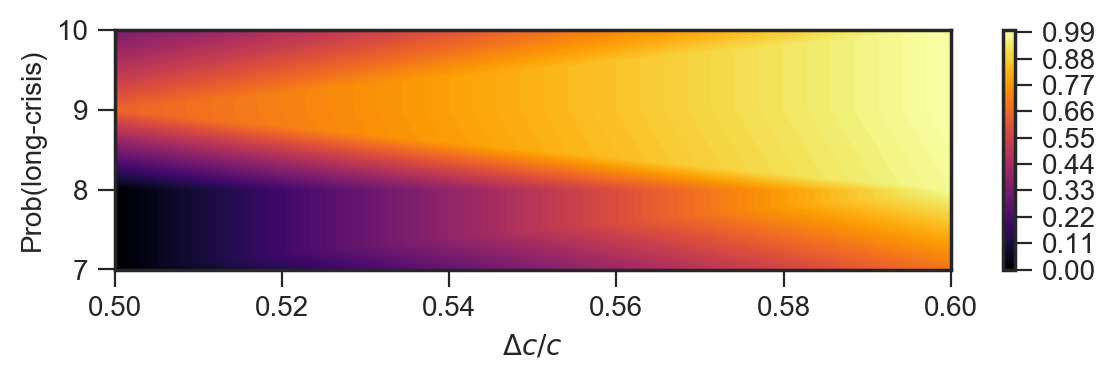

In [42]:
f, ax = plt.subplots(1,1,dpi=200, figsize=(6,2))
zmin = 0
zmax = 1.
CS = plt.contourf(xi, yi, zi, 100, cmap='inferno',
                  vmax=zmax, vmin=zmin)

plt.colorbar()  
plt.xlabel('$ \Delta c /c$')
plt.ylabel('Prob(long-crisis)')
plt.tight_layout()
fname = 'heat-map-proba-crisis-new-timescale'
# plt.savefig(os.path.join('..', path_plots, fname+'.pdf'))

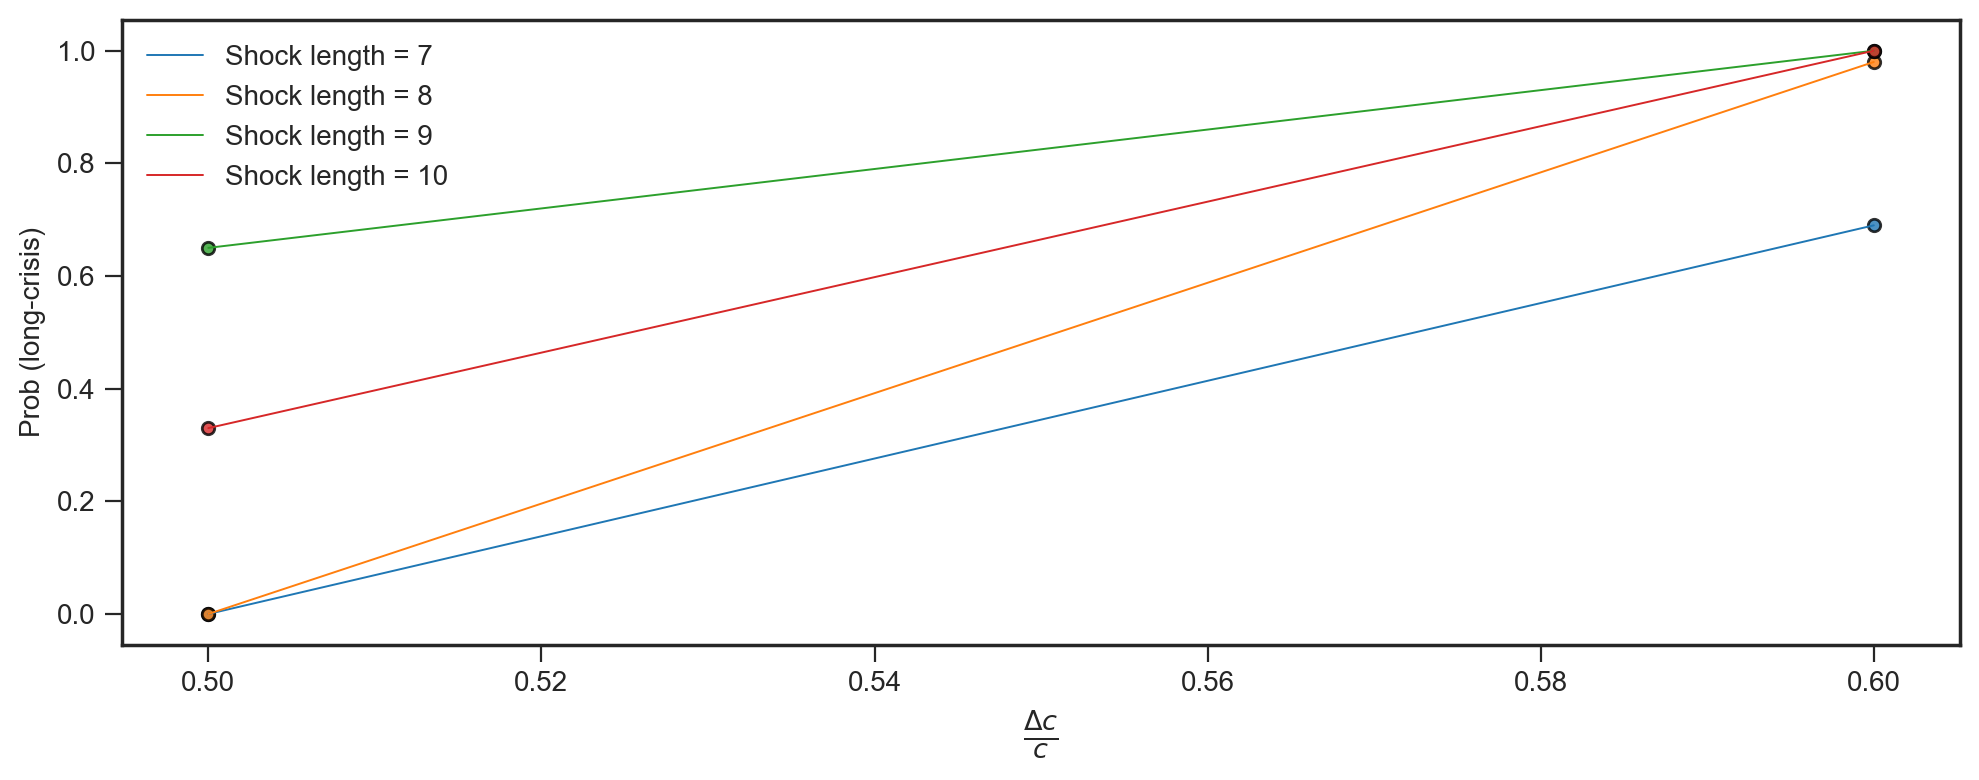

In [44]:
f, ax = plt.subplots(1,1,dpi=200, figsize=(10,4))

for length in lengths[:]:
    error = []
    for factor in factors[:]:
        error.append(get_long_crisis_rate(length, factor)[0])
    ax.plot(1-np.asarray(factors[:]), error, lw = 0.7, label = f'Shock length = {length}')
    ax.scatter(1-np.asarray(factors[:]), error, s =20, ec = "k", alpha=0.8)
# ax.set_xticks(range(len(factors[5:])))
# ax.set_xticklabels(1-np.asarray(factors[5:10]))
# ax.legend(prop = {'size':7})
ax.legend()
ax.set_ylabel('Prob (long-crisis)')
ax.set_xlabel('$\\frac{\Delta c}{c}$', fontsize=14)
# ax.set_xscale('log')
plt.tight_layout()
fname = 'length_short_crisis_new_time_scale'
# plt.savefig(os.path.join('..', path_plots, fname + '.pdf'))

## Influence of Policy Length 

In [6]:
complete_df = pd.read_csv(os.path.join( '..', 'output', 'policy_length_crisis_times.csv'), sep = "\t",)

In [7]:
factor = 0.2
filtered_df = complete_df[(complete_df['is-crisis'] != 0) & 
                          (complete_df.factor == factor) & (complete_df.slength==4) & (complete_df.plength == 5)]
filtered_df.error.mean()

0.0

In [8]:
def get_long_crisis_proba_policy(slength,plength, factor, df = complete_df):
    filtered_df = df[(df['factor'] == factor) & (df['slength'] == slength) & (df['is-crisis'] !=0) & (df['plength'] == plength)]
    proba_long_crisis= filtered_df.error.mean()
    maxu_mean = filtered_df['maxu'].mean()
    maxuaf_mean = filtered_df['maxuaf'].mean()
    T_crisis = filtered_df[filtered_df.error !=1]['T-crisis'].mean()

        
    return proba_long_crisis, T_crisis, maxu_mean, maxuaf_mean
#     if filtered_df.size > 0:
#         return filtered_df.error.mean(), filtered_df[filtered_df.error !=1]['T-crisis'].mean(),filtered_df['maxu'].mean(), filtered_df['maxuaf'].mean()
#     else:
#         return filtered_df.size, 0, filtered_df['maxu'].mean(), filtered_df['maxuaf'].mean()

In [9]:
slengths = range(4,11)
plengths = range(3,15)

In [41]:
factors = [0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7]

In [48]:
error = []
t_crisis = []
tmp_slength = []
tmp_plength = []
tmp_factor = []
maxu = []
maxuaf = []
for slength in slengths:
    for plength in plengths:
        for factor in factors:
            tmp_error, tmp_crisis,tmp_maxu, tmp_maxuaf = get_long_crisis_proba_policy(slength, plength, factor)
            error.append(tmp_error)
            maxu.append(tmp_maxu)
            maxuaf.append(tmp_maxuaf)
            t_crisis.append(tmp_crisis)
            tmp_slength.append(slength)
            tmp_plength.append(plength)
            tmp_factor.append(factor)
            print(f"SLength = {slength}, Plength ={plength} Factor = {factor}, Plong ={tmp_error}, Max-u = {tmp_maxu}, Max-uaf = {tmp_maxuaf}" )

SLength = 4, Plength =3 Factor = 0.1, Plong =1.0, Max-u = 0.9498077285714286, Max-uaf = 0.9498077285714286
SLength = 4, Plength =3 Factor = 0.2, Plong =1.0, Max-u = 0.9498077285714284, Max-uaf = 0.9498077285714284
SLength = 4, Plength =3 Factor = 0.3, Plong =1.0, Max-u = 0.9103742714285713, Max-uaf = 0.9138131857142856
SLength = 4, Plength =3 Factor = 0.4, Plong =0.8285714285714286, Max-u = 0.3321075, Max-uaf = 0.8791360571428571
SLength = 4, Plength =3 Factor = 0.5, Plong =0.0, Max-u = 0.1952817571428571, Max-uaf = 0.1952817571428571
SLength = 4, Plength =3 Factor = 0.6, Plong =0.0, Max-u = 0.14878724285714282, Max-uaf = 0.14878724285714282
SLength = 4, Plength =3 Factor = 0.7, Plong =0.0, Max-u = 0.10616385714285714, Max-uaf = 0.10616385714285714
SLength = 4, Plength =4 Factor = 0.1, Plong =1.0, Max-u = 0.42085342857142855, Max-uaf = 0.9502500857142857
SLength = 4, Plength =4 Factor = 0.2, Plong =1.0, Max-u = 0.3579338, Max-uaf = 0.9502500857142857
SLength = 4, Plength =4 Factor = 0.

SLength = 4, Plength =14 Factor = 0.4, Plong =0.0, Max-u = 0.24524202857142854, Max-uaf = 0.24524202857142854
SLength = 4, Plength =14 Factor = 0.5, Plong =0.0, Max-u = 0.19508197142857145, Max-uaf = 0.19508197142857145
SLength = 4, Plength =14 Factor = 0.6, Plong =0.0, Max-u = 0.14878724285714284, Max-uaf = 0.14878724285714284
SLength = 4, Plength =14 Factor = 0.7, Plong =0.0, Max-u = 0.10616385714285714, Max-uaf = 0.10616385714285714
SLength = 5, Plength =3 Factor = 0.1, Plong =1.0, Max-u = 0.9498077285714286, Max-uaf = nan
SLength = 5, Plength =3 Factor = 0.2, Plong =1.0, Max-u = 0.9498077285714288, Max-uaf = nan
SLength = 5, Plength =3 Factor = 0.3, Plong =1.0, Max-u = 0.9114699714285714, Max-uaf = 0.9130001571428571
SLength = 5, Plength =3 Factor = 0.4, Plong =1.0, Max-u = 0.9255166142857143, Max-uaf = 0.9255166142857143
SLength = 5, Plength =3 Factor = 0.5, Plong =0.0, Max-u = 0.2303339, Max-uaf = 0.2303339
SLength = 5, Plength =3 Factor = 0.6, Plong =0.0, Max-u = 0.1618786857142

SLength = 6, Plength =6 Factor = 0.6, Plong =0.0, Max-u = 0.16855830000000002, Max-uaf = 0.16855830000000002
SLength = 6, Plength =6 Factor = 0.7, Plong =0.0, Max-u = 0.11663358571428571, Max-uaf = 0.11663358571428571
SLength = 6, Plength =7 Factor = 0.1, Plong =0.0, Max-u = 0.5592732285714285, Max-uaf = 0.950207657142857
SLength = 6, Plength =7 Factor = 0.2, Plong =0.0, Max-u = 0.4595945285714285, Max-uaf = 0.9501102142857142
SLength = 6, Plength =7 Factor = 0.3, Plong =0.0, Max-u = 0.3720192714285715, Max-uaf = 0.9306814857142856
SLength = 6, Plength =7 Factor = 0.4, Plong =0.0, Max-u = 0.2951497428571429, Max-uaf = 0.2951497428571429
SLength = 6, Plength =7 Factor = 0.5, Plong =0.0, Max-u = 0.22771371428571427, Max-uaf = 0.22771371428571427
SLength = 6, Plength =7 Factor = 0.6, Plong =0.0, Max-u = 0.16855830000000002, Max-uaf = 0.16855830000000002
SLength = 6, Plength =7 Factor = 0.7, Plong =0.0, Max-u = 0.11663358571428568, Max-uaf = 0.11663358571428568
SLength = 6, Plength =8 Fact

SLength = 7, Plength =9 Factor = 0.2, Plong =0.0, Max-u = 0.4898990285714287, Max-uaf = 0.9530625714285715
SLength = 7, Plength =9 Factor = 0.3, Plong =0.0, Max-u = 0.3914975571428571, Max-uaf = 0.9321169428571429
SLength = 7, Plength =9 Factor = 0.4, Plong =0.0, Max-u = 0.30696295714285704, Max-uaf = 0.30696295714285704
SLength = 7, Plength =9 Factor = 0.5, Plong =0.0, Max-u = 0.23423882857142858, Max-uaf = 0.23423882857142858
SLength = 7, Plength =9 Factor = 0.6, Plong =0.0, Max-u = 0.1715357, Max-uaf = 0.1715357
SLength = 7, Plength =9 Factor = 0.7, Plong =0.0, Max-u = 0.11701585714285712, Max-uaf = 0.11701585714285712
SLength = 7, Plength =10 Factor = 0.1, Plong =0.0, Max-u = 0.6045255285714286, Max-uaf = 0.9500627857142857
SLength = 7, Plength =10 Factor = 0.2, Plong =0.0, Max-u = 0.4898990285714286, Max-uaf = 0.9555757000000001
SLength = 7, Plength =10 Factor = 0.3, Plong =0.0, Max-u = 0.3914975571428571, Max-uaf = 0.9301059571428572
SLength = 7, Plength =10 Factor = 0.4, Plong =

SLength = 8, Plength =8 Factor = 0.4, Plong =0.9571428571428572, Max-u = 0.31400624285714285, Max-uaf = 0.9502609428571428
SLength = 8, Plength =8 Factor = 0.5, Plong =0.0, Max-u = 0.23747895714285713, Max-uaf = 0.3477966428571428
SLength = 8, Plength =8 Factor = 0.6, Plong =0.0, Max-u = 0.17211107142857146, Max-uaf = 0.17211107142857146
SLength = 8, Plength =8 Factor = 0.7, Plong =0.0, Max-u = 0.11701585714285712, Max-uaf = 0.11547222857142858
SLength = 8, Plength =9 Factor = 0.1, Plong =0.0, Max-u = 0.6387902428571427, Max-uaf = 0.9499721285714287
SLength = 8, Plength =9 Factor = 0.2, Plong =0.0, Max-u = 0.5114694571428572, Max-uaf = 0.9505050714285713
SLength = 8, Plength =9 Factor = 0.3, Plong =0.0, Max-u = 0.40436615714285723, Max-uaf = 0.9038493142857144
SLength = 8, Plength =9 Factor = 0.4, Plong =0.0, Max-u = 0.3140062428571429, Max-uaf = 0.3140062428571429
SLength = 8, Plength =9 Factor = 0.5, Plong =0.0, Max-u = 0.23747895714285713, Max-uaf = 0.23747895714285713
SLength = 8, 

SLength = 9, Plength =10 Factor = 0.6, Plong =0.0, Max-u = 0.17211107142857146, Max-uaf = 0.17092787142857144
SLength = 9, Plength =10 Factor = 0.7, Plong =0.0, Max-u = 0.11701585714285714, Max-uaf = 0.11291629999999998
SLength = 9, Plength =11 Factor = 0.1, Plong =0.0, Max-u = 0.6647013142857142, Max-uaf = 0.9500844
SLength = 9, Plength =11 Factor = 0.2, Plong =0.0, Max-u = 0.5267437571428571, Max-uaf = 0.9500844
SLength = 9, Plength =11 Factor = 0.3, Plong =0.0, Max-u = 0.4127219, Max-uaf = 0.8855738857142859
SLength = 9, Plength =11 Factor = 0.4, Plong =0.0, Max-u = 0.3179600571428572, Max-uaf = 0.3179600571428572
SLength = 9, Plength =11 Factor = 0.5, Plong =0.0, Max-u = 0.23854802857142862, Max-uaf = 0.23854802857142862
SLength = 9, Plength =11 Factor = 0.6, Plong =0.0, Max-u = 0.1721110714285715, Max-uaf = 0.1709278714285714
SLength = 9, Plength =11 Factor = 0.7, Plong =0.0, Max-u = 0.11701585714285717, Max-uaf = 0.1129163
SLength = 9, Plength =12 Factor = 0.1, Plong =0.0, Max-u 

SLength = 10, Plength =10 Factor = 0.1, Plong =1.0, Max-u = 0.6842623142857144, Max-uaf = 0.9500627857142857
SLength = 10, Plength =10 Factor = 0.2, Plong =1.0, Max-u = 0.5374799285714287, Max-uaf = 0.9500627857142856
SLength = 10, Plength =10 Factor = 0.3, Plong =1.0, Max-u = 0.41799357142857146, Max-uaf = 0.9500627857142857
SLength = 10, Plength =10 Factor = 0.4, Plong =0.9857142857142858, Max-u = 0.3198779428571429, Max-uaf = 0.9500614285714284
SLength = 10, Plength =10 Factor = 0.5, Plong =0.35714285714285715, Max-u = 0.23854802857142857, Max-uaf = 0.8358793571428572
SLength = 10, Plength =10 Factor = 0.6, Plong =0.0, Max-u = 0.17211107142857143, Max-uaf = 0.16872020000000001
SLength = 10, Plength =10 Factor = 0.7, Plong =0.0, Max-u = 0.11701585714285714, Max-uaf = 0.10996675714285713
SLength = 10, Plength =11 Factor = 0.1, Plong =0.0, Max-u = 0.6842623142857143, Max-uaf = 0.9500844
SLength = 10, Plength =11 Factor = 0.2, Plong =0.0, Max-u = 0.5374799285714286, Max-uaf = 0.9500844


In [49]:
factor = 0.3
crisis_policy_df = pd.DataFrame({
    'T-crisis': t_crisis,
    'slength': tmp_slength, 
    'factor': tmp_factor, 
    'error': error,
    'plength' : tmp_plength,
    'maxu' : maxu, 
    'maxuaf': maxuaf
})
crisis_policy_df = crisis_policy_df[crisis_policy_df.factor == factor]

In [50]:
crisis_policy_df[(crisis_policy_df.slength ==8) ]

T-crisis  slength  factor  error  plength      maxu    maxuaf
338         NaN        8     0.3    1.0        3  0.911470  0.874299
345         NaN        8     0.3    1.0        4  0.950250       NaN
352         NaN        8     0.3    1.0        5  0.949792       NaN
359         NaN        8     0.3    1.0        6  0.950114       NaN
366         NaN        8     0.3    1.0        7  0.950208  0.950208
373         NaN        8     0.3    1.0        8  0.404366  0.949771
380  944.471429        8     0.3    0.0        9  0.404366  0.903849
387  879.471429        8     0.3    0.0       10  0.404366  0.904563
394  372.000000        8     0.3    0.0       11  0.404366  0.902888
401  279.657143        8     0.3    0.0       12  0.404366  0.903541
408  350.357143        8     0.3    0.0       13  0.404366  0.901340
415   95.071429        8     0.3    0.0       14  0.404366  0.908637

In [51]:
from scipy.interpolate import griddata

In [54]:
xi = np.linspace(crisis_policy_df.slength.min(), crisis_policy_df.slength.max(), 100)
yi = np.linspace(crisis_policy_df.plength.min(), crisis_policy_df.plength.max(), 100)
cols = ['error', 'maxuaf']
# Z is a matrix of x-y values
col_names = ['Proba(long-crisis)', 'Max U', ]

policy_influence_factor_0.3


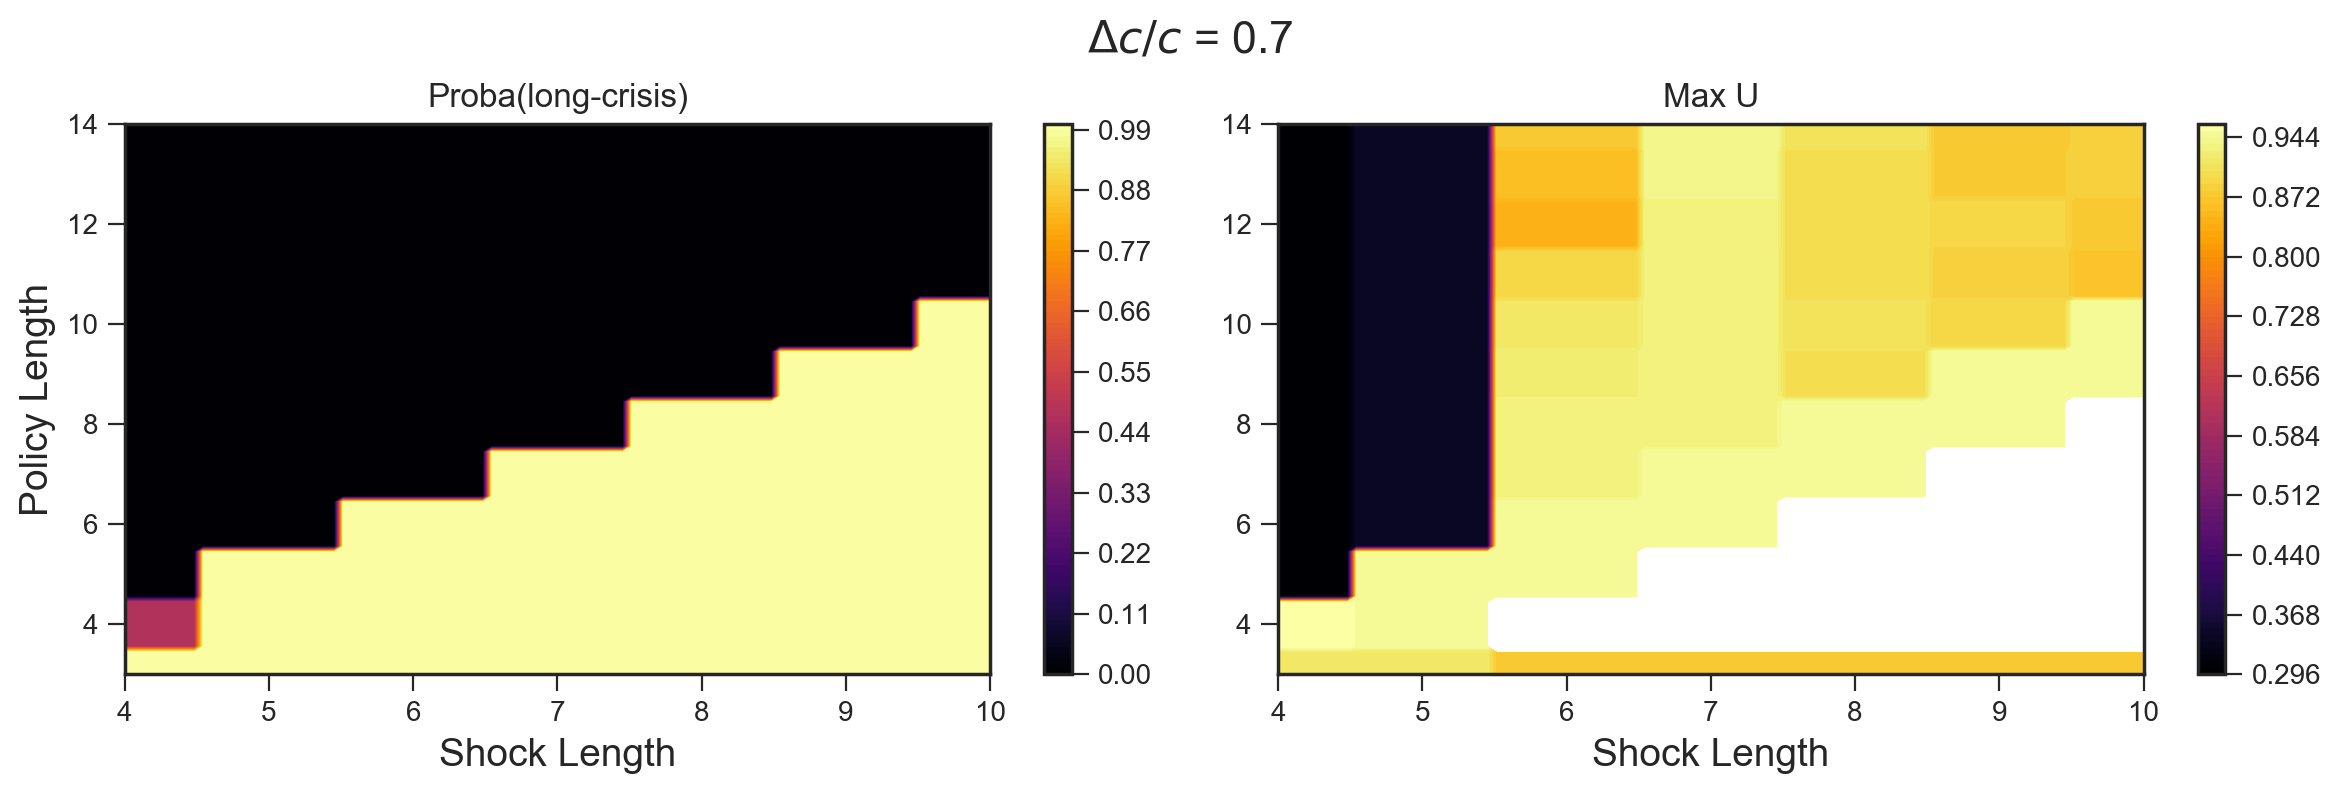

In [55]:
f, ax = plt.subplots(1,ncols=len(cols),dpi=200, figsize=(12,4))


for i in range(len(cols)):
    zi = griddata((crisis_policy_df.slength, crisis_policy_df.plength), crisis_policy_df[cols[i]], (xi[None,:], yi[:,None]), 
              method='nearest')
    zmin = crisis_policy_df[cols[i]].min()
    zmax = crisis_policy_df[cols[i]].max()
    CS = ax[i].contourf(xi, yi, zi, 100, cmap='inferno',
                  vmax=zmax, vmin=zmin)

    f.colorbar(CS, ax=ax[i])
    ax[i].set_xlabel('Shock Length', fontsize=14)
    ax[i].set_title(col_names[i])
ax[0].set_ylabel('Policy Length', fontsize=14)
plt.tight_layout()
plt.suptitle(f'$\Delta c/c$ = {1-factor}', fontsize =16)
plt.subplots_adjust(top=0.85)
fname = f'policy_influence_factor_{factor}'
print(fname)
plt.savefig(os.path.join('..', path_plots,fname+'.pdf'))

maxu_crisis_policy_factor_0.5


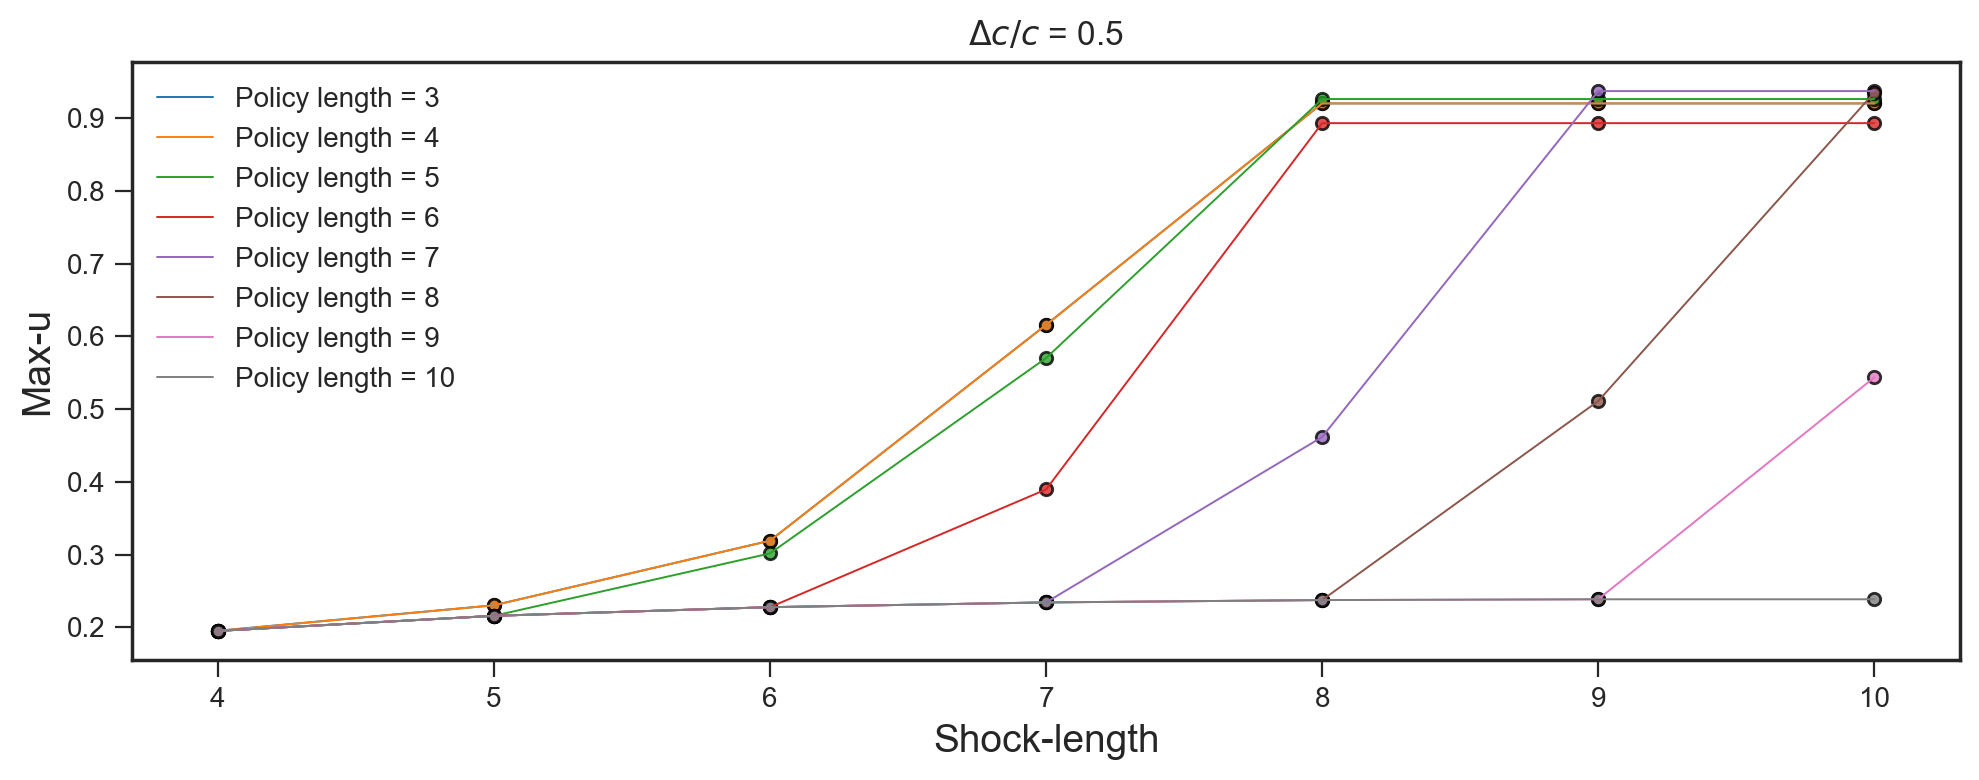

In [19]:
f, ax = plt.subplots(1,1,dpi=200, figsize=(10,4))
factor = 0.5
for plength in plengths[:-4]:
    error = []
    for slength in slengths[:]:
        error.append(get_long_crisis_proba_policy(slength, plength, factor)[2])
    ax.plot(slengths, error, lw = 0.7, label = f'Policy length = {plength}')
    ax.scatter(slengths, error, s =20, ec = "k", alpha=0.8)
# ax.set_xticks(range(len(factors[5:])))
# ax.set_xticklabels(1-np.asarray(factors[5:10]))
# ax.legend(prop = {'size':7})
ax.legend()
ax.set_ylabel('Max-u', fontsize=14)
ax.set_xlabel('Shock-length', fontsize=14)
# ax.set_xscale('log')

fname = f'maxu_crisis_policy_factor_{factor}'
print(fname)
ax.set_title('$\Delta c/c$ = {:.1f}'.format(1-factor) )
plt.tight_layout()
# plt.savefig(os.path.join('..', path_plots, fname + '.pdf'))

## Cons+Prod shock statistics

In [82]:
data_df = pd.read_csv(os.path.join( '..', 'output', 'cons_prod_crisis_times.csv'), sep = "\t",)

In [83]:
cfactors = list(np.arange(2,10)/10)
cfactors.append(0.95)
zfactors = np.copy(cfactors)
print(cfactors, zfactors)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95] [0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.95]


In [84]:
data_df[data_df['is-double'] == 1]

T-crisis  cfactor  error  index  is-crisis  is-double      maxu  \
0             1      0.4      1   29.0          1          1  0.120379   
10            1      0.5      1   47.0          1          1  0.935384   
19            2      0.5      1   39.0          1          1  0.126443   
20            2      0.4      1   22.0          1          1  0.136738   
31            2      0.4      0   61.0          1          1  0.937751   
...         ...      ...    ...    ...        ...        ...       ...   
16954         2      0.5      1   51.0          1          1  0.109755   
16968         2      0.6      0   64.0          1          1  0.111451   
16969         2      0.3      1   41.0          1          1  0.949942   
16983         2      0.6      0    1.0          1          1  0.111446   
17006         1      0.4      1   14.0          1          1  0.120349   

         maxuaf  second-crisis  slength  zfactor  
0      0.954042             -2      4.0      0.3  
10     0.935384             -2      6.0      0.4  
19     0.950198             -1      4.0      0.6  
20     0.949798             -1      4.0      0.4  
31     0.880594            689      6.0      0.4  
...         ...            ...      ...      ...  
16954  0.988467             -2      5.0      0.5  
16968  0.908918           1736      6.0      0.8  
16969  0.949942             -1      5.0      0.2  
16983  0.892898           1666      6.0      0.8  
17006  0.951281             -2      4.0      0.2  

[1960 rows x 11 columns]

In [85]:
lengths = [4,5,6]

In [86]:
def is_failure(row):
    if (row['T-crisis'] <= row['slength']) & (row['is-crisis'] ==1) & (row['is-double'] != 1) & (row['error'] ==1):
        return 1
    else:
        return 0
data_df['failure'] = data_df.apply(is_failure, axis=1)

In [87]:
## Proba long crisis
## All entries such that have error=1 
length=4
tmp_cfactors = []
tmp_zfactors = []
errors = []
failures = []
total_errors = []
cond_errors = [] # P(long-crisis)| double-crisis
## All of these are conditioned
peak_u1 = [] # Peak during crisis
peak_u2 = [] # Peak during rest 
all_peak = [] # Overall maximum
ctime1 = [] # Single crisis short-crisis time (if not infinite)
ctime2 = [] # Double crisis first-crisis time 
ctime3 = [] # Double crisis second-crisis time (if not infinite)

filtered_df = data_df[data_df.slength == length]
for cfactor in cfactors:
    for zfactor in zfactors:
        tmp_df = filtered_df[(filtered_df.cfactor == cfactor) & (filtered_df.zfactor == zfactor)]
        error = tmp_df[tmp_df.failure == 0].error.mean()
        failure = tmp_df[tmp_df.failure !=0].failure.mean()
        total_error = tmp_df.error.mean()
        cond_error = tmp_df[(tmp_df.failure == 0) & (tmp_df['is-double'] == 1)].error.mean()
        u1 = tmp_df[tmp_df.failure == 0].maxu.mean()
        u2 = tmp_df[tmp_df.failure == 0].maxuaf.mean()
        u3 = max(u1, u2)
        
        c1 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] != 1)]['T-crisis'].mean()
        c2 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] == 1)]['T-crisis'].mean()
        c3 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] == 1)]['second-crisis'].mean()
        
        errors.append(error)
        total_errors.append(total_error)
        failures.append(failure)
        tmp_cfactors.append(cfactor)
        tmp_zfactors.append(zfactor)
        peak_u1.append(u1)
        peak_u2.append(u2)
        all_peak.append(u3)
        cond_errors.append(cond_error)
        ctime1.append(c1)
        ctime2.append(c2)
        ctime3.append(c3)

error_df = pd.DataFrame({
    'cfactor': tmp_cfactors, 
    'zfactor': tmp_zfactors, 
    'error': errors,
    'failure': failures,
    'error-tot': total_errors, 
    'u1': peak_u1, 
    'u2': peak_u2, 
    'u3': all_peak, 
    'c1': ctime1, 
    'c2': ctime2, 
    'c3': ctime3, 
    'cond-error': cond_errors
})

In [88]:
xi = np.linspace(1-error_df.cfactor.min(), 1-error_df.cfactor.max(), 100)
yi = np.linspace(1-error_df.zfactor.min(), 1-error_df.zfactor.max(), 100)
cols = ['error', 'error-tot']
# cols = ['c1',  'cond-error']
# Z is a matrix of x-y values
col_names = ['P(long-crisis)', 'P(long-crisis) - complete']
# col_names = ['T-crisis (single)',  'P(long-crisis|double-crisis)']

cons_prod_short_crisis_4


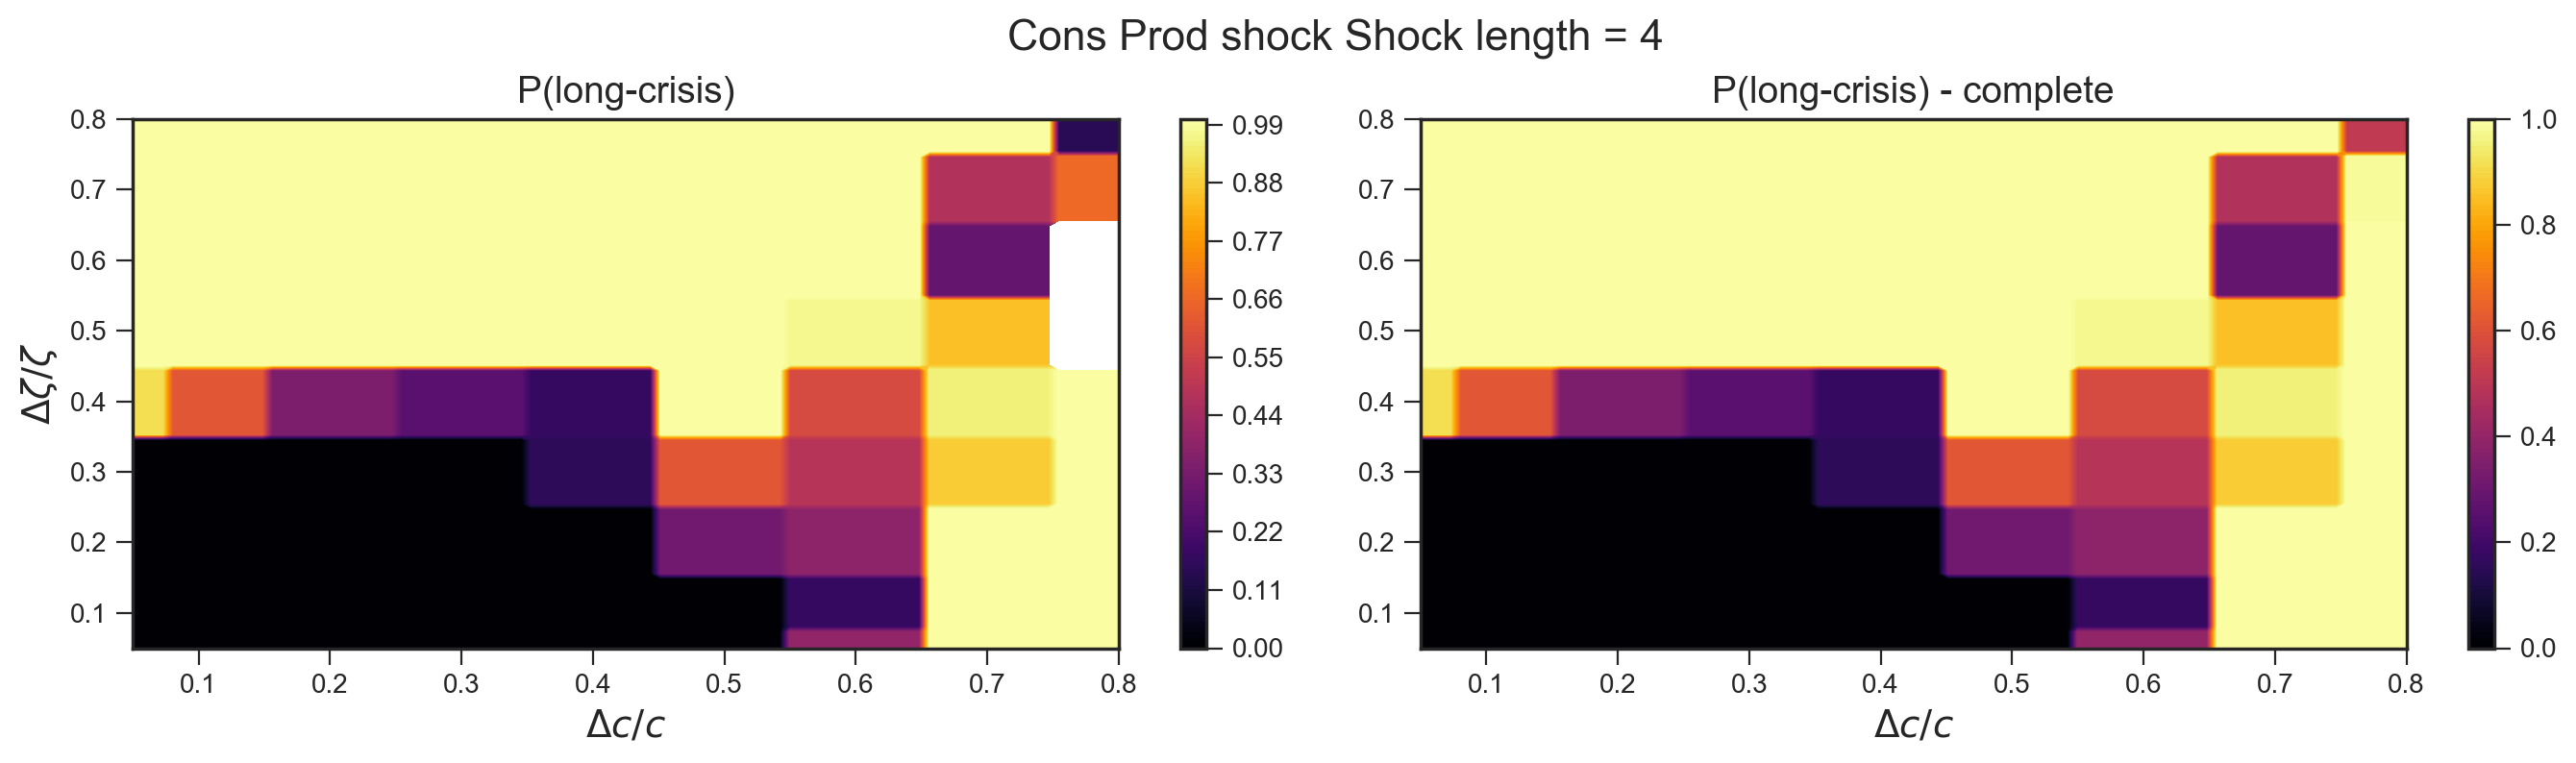

In [89]:
ncols = len(cols)
f, ax = plt.subplots(1,ncols,dpi=200, figsize=(14,4))
for i in range(len(cols)):
    zi = griddata((1-error_df.cfactor, 1-error_df.zfactor), error_df[cols[i]], (xi[None,:], yi[:,None]), 
              method='nearest')
    zmin = error_df[cols[i]].min()
    zmax = error_df[cols[i]].max()
    CS = ax[i].contourf(xi, yi, zi, 100, cmap='inferno',
                  vmax=zmax, vmin=zmin)

    cbar = f.colorbar(CS, ax=ax[i])

    ax[i].set_title(col_names[i], fontsize=14)
    ax[i].set_xlabel('$\Delta c/ c$', fontsize=14)

cbar_ticks = np.linspace(0., 1., num=6, endpoint=True)
cbar.set_ticks(cbar_ticks)
ax[0].set_ylabel('$\Delta \zeta / \zeta$', fontsize=14)
plt.suptitle(f'Cons Prod shock Shock length = {length}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
fname = f'cons_prod_short_crisis_{length}'
print(fname)
# plt.savefig(os.path.join('..', path_plots,fname+'.pdf'))

## Prod debt statistics

In [57]:
# data_df = pd.read_csv(os.path.join('..', 'output', 'prod_debt_policy_crisis_times.csv'), sep = "\t",)
data_df = pd.read_csv(os.path.join('..', 'output', 'prod_debt_helico_crisis_times.csv'), sep = "\t",)

In [58]:
def is_failure2(row):
    if (row['T-crisis'] <= 4500) & (row['is-crisis'] ==1) & (row['is-double'] != 1) & (row['error'] ==1):
        return 1
    else:
        return 0
data_df['failure'] = data_df.apply(is_failure2, axis=1)

In [59]:
data_df

T-crisis  cfactor  error  index  is-crisis  is-double      maxu  \
0            6      0.7      0   26.0          1          0  0.000818   
1            7      0.7      0   84.0          1          1  0.000797   
2         4999      0.7      1   95.0          1          0  1.000000   
3            7      0.7      0   34.0          1          1  0.000833   
4            6      0.7      0   29.0          1          0  0.000825   
...        ...      ...    ...    ...        ...        ...       ...   
8395      4999      0.7      1    8.0          1          0  1.000000   
8396      4999      0.7      1   77.0          1          0  1.000000   
8397         6      0.7      0   22.0          1          0  0.000840   
8398         6      0.7      0   23.0          1          0  0.000807   
8399         6      0.7      0   56.0          1          0  0.000830   

        maxuaf  plength  second-crisis  slength  zfactor  failure  
0     1.000000     13.0              0      8.0      0.5        0  
1     1.000000     12.0              5      4.0      0.5        0  
2     1.000000      7.0              0      8.0      0.5        0  
3     1.000000      5.0              3      4.0      0.5        0  
4     1.000000     12.0              0      6.0      0.5        0  
...        ...      ...            ...      ...      ...      ...  
8395  0.986917      5.0              0      9.0      0.5        0  
8396  0.991673      4.0              0      8.0      0.5        0  
8397  1.000000     10.0              0      5.0      0.5        0  
8398  1.000000     10.0              0      6.0      0.5        0  
8399  1.000000     12.0              0      7.0      0.5        0  

[8400 rows x 13 columns]

In [60]:
slengths = range(4,11)
plengths = range(3,15)

In [61]:
## Proba long crisis
## All entries such that have error=1 
cfactor=0.7
zfactor=0.5
tmp_slengths = []
tmp_plengths = []
errors = []
failures = []
total_errors = []
cond_errors = [] # P(long-crisis)| double-crisis
## All of these are conditioned
peak_u1 = [] # Peak during crisis
peak_u2 = [] # Peak during rest 
all_peak = [] # Overall maximum
ctime1 = [] # Single crisis short-crisis time (if not infinite)
ctime2 = [] # Double crisis first-crisis time 
ctime3 = [] # Double crisis second-crisis time (if not infinite)

filtered_df = data_df[(data_df.cfactor == cfactor) & (data_df.zfactor == zfactor)]
for slength in slengths:
    for plength in plengths:
        tmp_df = filtered_df[(filtered_df.slength == slength) & (filtered_df.plength == plength)]
        error = tmp_df[tmp_df.failure == 0].error.mean()
        failure = tmp_df[tmp_df.failure !=0].failure.mean()
        total_error = tmp_df.error.mean()
        cond_error = tmp_df[(tmp_df.failure == 0) & (tmp_df['is-double'] == 1)].error.mean()
        u1 = tmp_df.maxu.mean()
        u2 = tmp_df.maxuaf.mean()
        u3 = max(u1, u2)
        
        c1 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] != 1)]['T-crisis'].mean()
        c2 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] == 1)]['T-crisis'].mean()
        c3 = tmp_df[(tmp_df.failure != 1) & (tmp_df.error != 1) & (tmp_df['is-double'] == 1)]['second-crisis'].mean()
        
        errors.append(error)
        total_errors.append(total_error)
        failures.append(failure)
        tmp_slengths.append(slength)
        tmp_plengths.append(plength)
        peak_u1.append(u1)
        peak_u2.append(u2)
        all_peak.append(u3)
        cond_errors.append(cond_error)
        ctime1.append(c1)
        ctime2.append(c2)
        ctime3.append(c3)

error_df_prod_debt = pd.DataFrame({
    'slength': tmp_slengths, 
    'plength': tmp_plengths, 
    'error': errors,
    'failure': failures,
    'error-tot': total_errors, 
    'u1': peak_u1, 
    'u2': peak_u2, 
    'u3': all_peak, 
    'c1': ctime1, 
    'c2': ctime2, 
    'c3': ctime3, 
    'cond-error': cond_errors
})

In [77]:
xi = np.linspace(error_df_prod_debt.slength.min(), error_df_prod_debt.slength.max(), 100)
yi = np.linspace(error_df_prod_debt.plength.min(), error_df_prod_debt.plength.max(), 100)
cols = ['error-tot', 'u1','u2', 'c1', 'c2', 'c3']
# cols = ['c1',  'cond-error']
# Z is a matrix of x-y values
col_names = ['Proba(long-crisis)', 'Max u (first)', 'Max u (after)',  
            'Short-crisis times', 'Short-crisis|Double crisis', 'Second crisis times']

prod_debt_helico_influence_factor_0.5


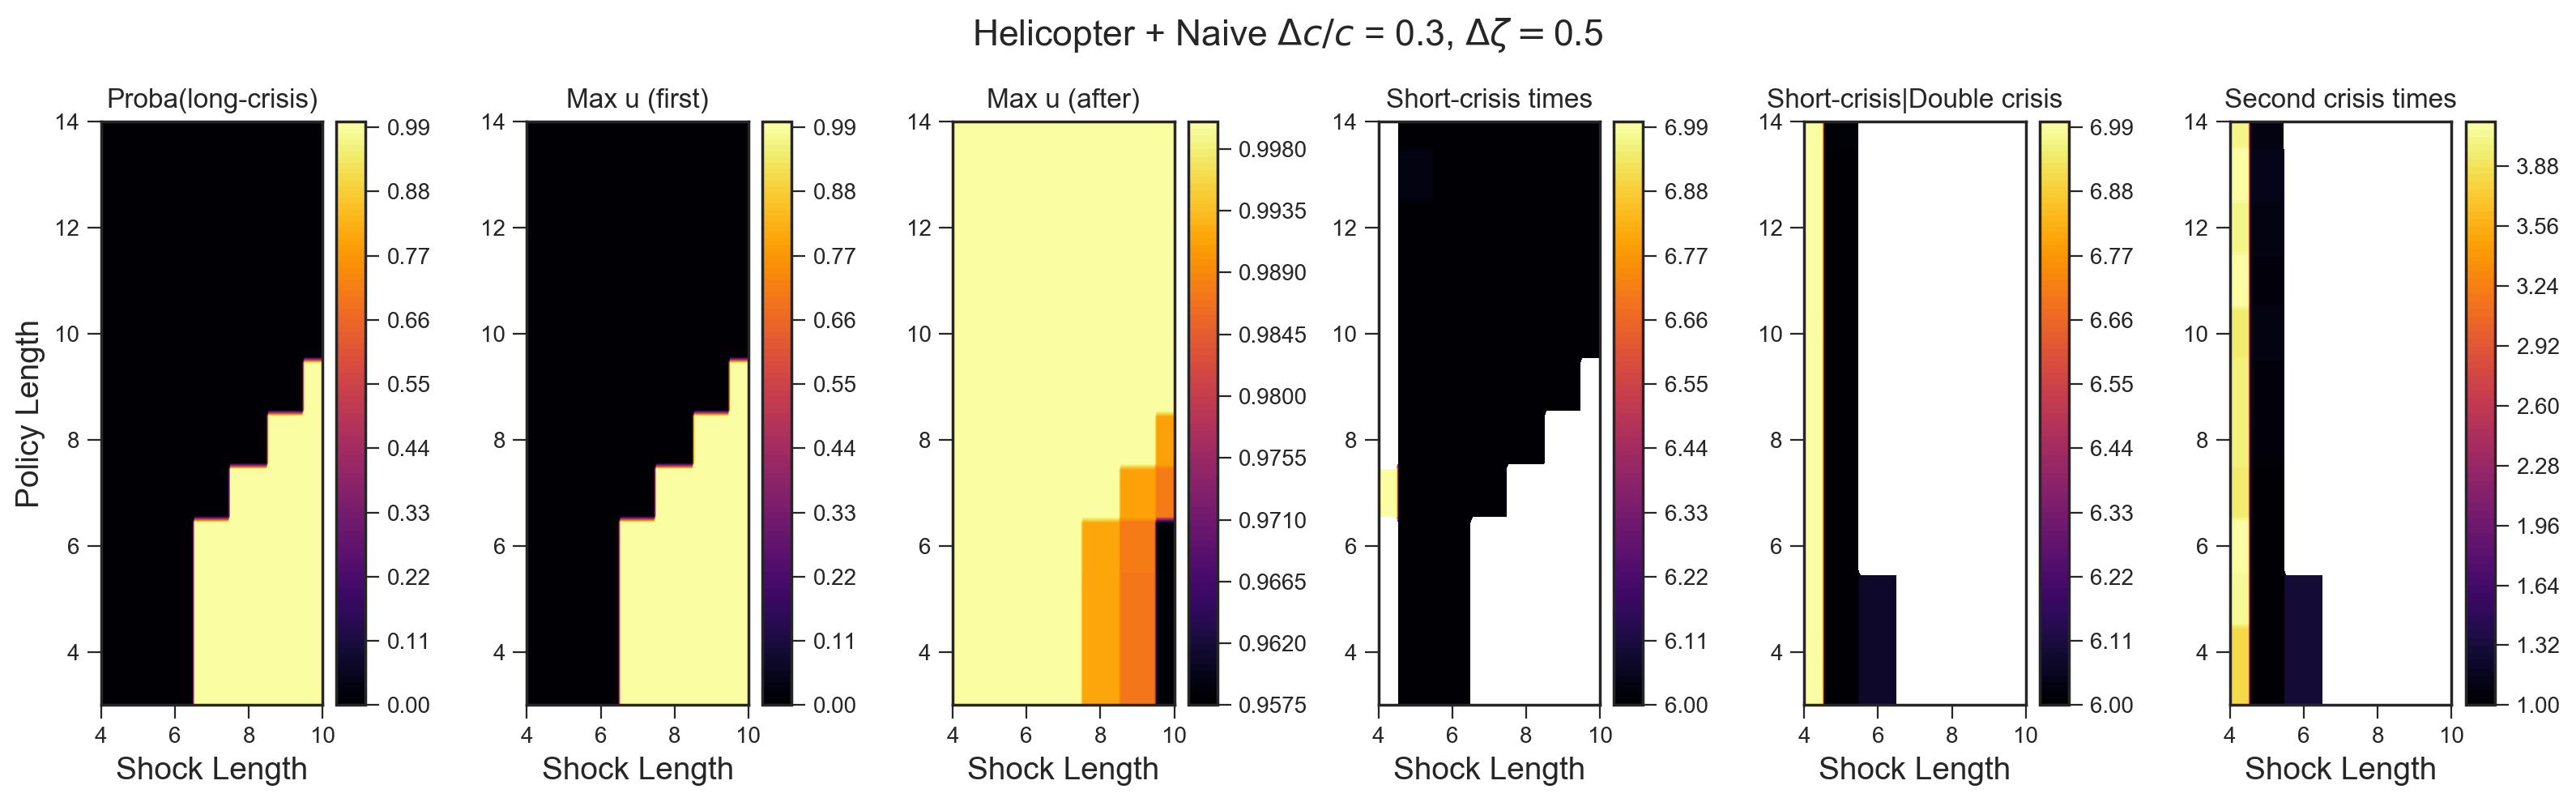

In [81]:
f, ax = plt.subplots(1,ncols=len(cols),dpi=200, figsize=(16,5))


for i in range(len(cols)):
    zi = griddata((error_df_prod_debt.slength, error_df_prod_debt.plength), 
                  error_df_prod_debt[cols[i]], (xi[None,:], yi[:,None]), 
              method='nearest')
    zmin = error_df_prod_debt[cols[i]].min()
    zmax = error_df_prod_debt[cols[i]].max()
    CS = ax[i].contourf(xi, yi, zi, 100, cmap='inferno',
                  vmax=zmax, vmin=zmin)

    f.colorbar(CS, ax=ax[i])
    ax[i].set_xlabel('Shock Length', fontsize=14)
    ax[i].set_title(col_names[i])
ax[0].set_ylabel('Policy Length', fontsize=14)
plt.tight_layout()
plt.suptitle('Helicopter + Naive $\Delta c/c$ = {:.1f}, $\Delta \zeta = ${:.1f}'.format(1-cfactor, 1-zfactor), fontsize =16)
plt.subplots_adjust(top=0.85)
fname = f'prod_debt_helico_influence_factor_{zfactor}'
print(fname)
plt.savefig(os.path.join('..', path_plots,fname+'.pdf'))

In [773]:
shockflag = 6
param_names = ['shockflag', 't_start', 't_end', 'policy_start', 'policy_end', 'factor', 'zfactor', 'seed']
param_values = [shockflag, 2000, 2005, 2000, 2005, 0.7,0.5, 1]

In [774]:
out = run_program_default(param_names, param_values, './covid')


In [777]:
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

FileNotFoundError: [Errno 2] File b'/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build/output/fire_hire_debt.txt' does not exist: b'/Users/dhruv/PhDStuff/my-phd-projects/code_covid_send/build/output/fire_hire_debt.txt'

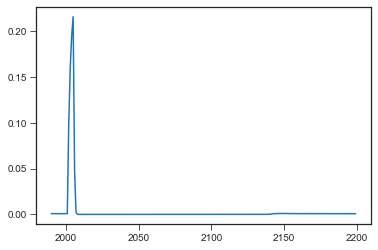

In [148]:
plt.plot(res['u'][1990:2200])

In [143]:
find_intersection(res['u'][2001:], 0.1)

(array([1]), array([0, 5]))

In [144]:
np.max(res['u'][2001:2008])

0.215827